<img src="https://i.pinimg.com/originals/35/64/df/3564df679019522e843e597c1e4e1dce.jpg"> 

## <center> WestWorld - Robots, Humans and The Thin Line Between

<center> In this study, we would like to examine whether we can tell the **difference between** an **artificial human being** and **real biological humans** by studying their speech. We will study this hypothesis on the HBO's WestWorld TV Show.

First, we have to prepare the data for the analysis. Sadly **no source** of the actual script of all the WestWorld TV show 27 episodes was available online, therefore, we had to start by **downloading subtitles** and **manually adding** the speaker for each replica in each episode. Well... it was a great recap of the plot

With that being said, in addition to the notebook, the project file includes separate subtitle file for each episode which serves as the data source.

## <center> 1. Data Preprocessing

### <center> 1.1. Dataset Creation

In [1]:
# Importing modules for initial data manipulation
import pandas as pd
import numpy as np
import re
import os
from collections import Counter
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

In [2]:
os.getcwd()

'C:\\Users\\Michal\\Desktop\\NLPFINAL'

As we are working with the subtitle files, first, they need to be parsed into the individual replicas said by each character.

In [3]:
def parse_script(chpattern, filepath):
    replicas = []
    characters = []
    rep = []
    with open(filepath, 'rb') as f:
        for a,line in enumerate(f.readlines()):
            if len(line.strip()) > 0:
                line = line.decode('utf-8')
                try:
                    m = re.match(chpattern, line)
                    char = m.group()
                    if len(characters)==0:
                        characters += [char[:-1].lower()]
                    elif len(rep) != 0:
                        characters += [char[:-1].lower()]
                        rep = ' '.join(rep)
                        replicas += [rep]
                        rep = []
                    rest = line.split(':')[1].strip()
                    rest = re.sub('\\([aA-zZ\s]+\\)', '', rest)
                    if rest != '':
                        rep += [rest.strip()] #del split
                except:
                    if '(' not in line:
                        l = line.strip() #del split
                        rep += [l]
        rep = ' '.join(rep)
        replicas += [rep]
    return replicas, characters

After defining our parsing function, we can load the data and parse them on the character abbreviation which is at the beginning of each replica.

In [4]:
allrep = []
allchar = []
chpattern = '^[\s\-]*[the]*[A-Z][oman,\s]*[aA-zZ\-\',\#\.\1-9\s]{0,14}[accent^]*:'
script_dir = 'raw_data/'

for file in sorted(os.listdir(script_dir)):
    r, c = parse_script(chpattern, script_dir+file)
    print(file, ':', 'replicas:', len(r), 'characters:', len(c))
    allrep += r
    allchar += c

s01e01.txt : replicas: 303 characters: 303
s01e02.txt : replicas: 271 characters: 271
s01e03.txt : replicas: 262 characters: 262
s01e04.txt : replicas: 296 characters: 296
s01e05.txt : replicas: 255 characters: 255
s01e06.txt : replicas: 342 characters: 342
s01e07.txt : replicas: 275 characters: 275
s01e08.txt : replicas: 304 characters: 304
s01e09.txt : replicas: 292 characters: 292
s01e10.txt : replicas: 333 characters: 333
s02e01.txt : replicas: 321 characters: 321
s02e02.txt : replicas: 252 characters: 252
s02e03.txt : replicas: 258 characters: 258
s02e04.txt : replicas: 261 characters: 261
s02e05.txt : replicas: 145 characters: 145
s02e06.txt : replicas: 213 characters: 213
s02e07.txt : replicas: 353 characters: 353
s02e08.txt : replicas: 135 characters: 135
s02e09.txt : replicas: 287 characters: 287
s02e10.txt : replicas: 389 characters: 389
s03e01.txt : replicas: 411 characters: 411
s03e02.txt : replicas: 344 characters: 344
s03e03.txt : replicas: 382 characters: 382
s03e04.txt 

Let's first have a look at how big our dataset is

In [5]:
print('Number of replicas:  {0}'.format(len(allrep)))
print('Number of charactes:  {0}'.format(len(np.unique(allchar))))

Number of replicas:  7694
Number of charactes:  60


And also, what are the character abbreviation we will be dealing with

In [6]:
np.unique(allchar)

array(['- dolores', '- h', '- man', '- man #2', '- t', '- w', '-e', 'a',
       'b', 'bernard', 'c', 'clarence', 'clem', 'clementine', 'd',
       'dolores', 'e', 'f', 'father', 'ford', 'h', 'ha', 'hec', 'host',
       'l', 'la', 'lee', 'li', 'lo', 'lo ', 'lowe', 'm', 'ma', 'mae',
       'maeve', "maeve's voice", 'man', "man's voice", 'mea', 'mr', 'n',
       'od', 'p', 'passenger', 'peter', 's', 'se', 'sheriff', 'st',
       'stubbs', 't', 'ted', 'the', 'the ', 'thug', 'w', 'wiliam', 'wj',
       'woman', 'woman on p.a.'], dtype='<U13')

Let's get rid of ambiguities in the names of the characters

In [7]:
allchar = ['dolores' if n in ['- dolores', 'd'] else n for n in allchar]
allchar = ['stubbs' if n in ['st'] else n for n in allchar]
allchar = ['theresa' if n in ['the', 'the', 'the '] else n for n in allchar]
allchar = ['elsie' if n in ['e', '-e'] else n for n in allchar]
allchar = ['bernard' if n in ['b'] else n for n in allchar]
allchar = ['teddy' if n in ['t', '- t', 'ted'] else n for n in allchar]
allchar = ['lee' if n in ['l'] else n for n in allchar]
allchar = ['peter' if n in ['p', 'peter aber'] else n for n in allchar]
allchar = ['man' if n in ['m', '- man', '- man #2']  else n for n in allchar]
allchar = ['hector' if n in ['hec'] else n for n in allchar]
allchar = ['host' if n in ['h', '- h'] else n for n in allchar]
allchar = ['maeve' if n in ['mae', 'mea', 'ma']  else n for n in allchar]
allchar = ['logan' if n in ['lo', 'lo '] else n for n in allchar]
allchar = ['host' if n in ['h'] else n for n in allchar]
allchar = ['lawrence' if n in ['la']else n for n in allchar]
allchar = ['hale' if n in ['ha'] else n for n in allchar]
allchar = ['strand' if n in ['s'] else n for n in allchar]
allchar = ['william' if n in ['w', '- w', 'wiliam'] else n for n in allchar]
allchar = ['ford' if n in ['f'] else n for n in allchar]
allchar = ['clementine' if n in ['clem'] else n for n in allchar]
allchar = ['man' if n in ['woman', 'woman, western accent', 'woman, standard accent', 'woman on p.a.'] else n for n in allchar]
allchar = ['emily' if n in ['wj'] else n for n in allchar]
allchar = ['akavhita' if n in ['a'] else n for n in allchar]
allchar = ['caleb' if n in ['c'] else n for n in allchar]
allchar = ['serac' if n in ['se'] else n for n in allchar]
allchar = ['liam' if n in ['li'] else n for n in allchar]

In [8]:
np.unique(allchar)

array(['akavhita', 'bernard', 'caleb', 'clarence', 'clementine',
       'dolores', 'elsie', 'emily', 'father', 'ford', 'hale', 'hector',
       'host', 'lawrence', 'lee', 'liam', 'logan', 'lowe', 'maeve',
       "maeve's voice", 'man', "man's voice", 'mr', 'n', 'od',
       'passenger', 'peter', 'serac', 'sheriff', 'strand', 'stubbs',
       'teddy', 'theresa', 'thug', 'william'], dtype='<U13')

Now, when we have the actual names, we can examine number of replicas of each of the character. The **man** and **host** "characters" are just categories into which, we added all of the characters that are not important enough to have their own label.

In [9]:
Counter(allchar)

Counter({'man': 1114,
         'dolores': 840,
         'peter': 41,
         'passenger': 1,
         'teddy': 175,
         'clementine': 38,
         'maeve': 511,
         'thug': 3,
         'william': 733,
         'bernard': 730,
         'elsie': 219,
         'theresa': 145,
         'stubbs': 187,
         'host': 987,
         'ford': 436,
         'sheriff': 2,
         'clarence': 2,
         'lee': 182,
         'father': 1,
         'hector': 115,
         "man's voice": 2,
         'logan': 165,
         'lawrence': 110,
         "maeve's voice": 1,
         'n': 1,
         'hale': 210,
         'strand': 63,
         'akavhita': 22,
         'od': 39,
         'emily': 144,
         'mr': 1,
         'lowe': 1,
         'caleb': 185,
         'liam': 118,
         'serac': 170})

We will now get rid of the noise and we will keep the main characters. Also, **label showing whether they are or are not actual humans **(this column will serve for the prediction purposses later) is added.

In [10]:
df = pd.DataFrame(allrep, columns = ['replica'])
df['char'] = allchar
df["human"] = [1 if x in ["man","william","elsie","theresa","stubbs","ford","lee","logan","hale",
                          "emily","strand","delos", "caleb", "serac", "liam"] else 0 for x in df['char']]
df.head()
df2 = df

In [11]:
idx_not_del = [i for i,x in enumerate(df['char']) if x not in ['mr', 'n', "maeve's voice", "man's voice", 'father', 'sheriff', 'clarence', 'thug',
                          'passenger', 'lowe']]

In [12]:
df = df.iloc[idx_not_del, :].reset_index(drop=True)

After the initial creation of the dataset, this is the list of our characters for which we use the binary variable "human" being 1, if they are not artificial beings

In [13]:
df.char.unique()

array(['man', 'dolores', 'peter', 'teddy', 'clementine', 'maeve',
       'william', 'bernard', 'elsie', 'theresa', 'stubbs', 'host', 'ford',
       'lee', 'hector', 'logan', 'lawrence', 'hale', 'strand', 'akavhita',
       'od', 'emily', 'caleb', 'liam', 'serac'], dtype=object)

In [14]:
df.human.unique()

array([1, 0], dtype=int64)

In [15]:
df_original = df

### <center> 1.2. Replicas Processing Steps

Following steps are taken to preprocess the data for most of the analysis (excluding Structured Prediction):

- Removal of Punctuation

- Lemmatisation

- Removal of Stopwords

- Removal of Numbers

In [16]:
import spacy
import nltk
import string
nlp = spacy.load('en_core_web_sm')

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
instances = df.replica.apply(lambda x: x.split(' '))

Let's look at our data before the preprocessing

In [19]:
print('Before preprocessing out corpus contains:')
print('Number of documents: {0}'.format(len(instances)))
tokens_processed_quora = []
for i in range(len(instances)):
    for j in instances [i]:
        if j.strip() != '':
            tokens_processed_quora.append(j)
print('Number of tokens:    {0}'.format(len(tokens_processed_quora)))
print('Number of types:      {0}'.format(len(set(tokens_processed_quora))))

Before preprocessing out corpus contains:
Number of documents: 7679
Number of tokens:    91930
Number of types:      12260


As the subtitles include a lot of punctuation and characters used for the subtitle purposes, we make sure to get rid of all of them.

In [20]:
remove = string.punctuation
pattern = r"[{}]".format(remove)

In [21]:
df.replica = df.replica.apply(lambda x: re.sub(pattern, '', x))
df.replica = df.replica.apply(lambda x: re.sub("[0-9]*", '', x))

Now, when we are sure we only have the actual words we are interested in, we can lemmatize the replicas. In addition to the parts
of speech that we were using in class for preprocessing, we decided to add interjunctions and leave pronouns as they are, since it showed to slightly help with prediction.

In [22]:
instances = [[token.text.lower() if token.pos_=='PRON' else token.lemma_.lower() if token.pos_ in
              {'INTJ', 'NOUN', 'VERB', 'PROPN', 'ADJ', 'ADV'} and not token.is_stop and len(token)>2 else ''
              for token in nlp(sentence)]
          for sentence in df.replica]

As before, we can compare what we removed with the lemmatization

In [23]:
print('After preprocessing out corpus contains:')
print('Number of documents: {0}'.format(len(instances)))
tokens_processed_quora = []
for i in range(len(instances)):
    for j in instances [i]:
        if j.strip() != '':
            tokens_processed_quora.append(j)
print('Number of tokens:    {0}'.format(len(tokens_processed_quora)))
print('Number of types:      {0}'.format(len(set(tokens_processed_quora))))

After preprocessing out corpus contains:
Number of documents: 7679
Number of tokens:    49076
Number of types:      5070


Now, we just put the replicas into the form of a dataset which we will use throughout the project

In [24]:
X = []
for j in range(len(instances)):
    x = ''
    for i in (instances[j]):
        x += i + ' '
    X.append(x)

In [25]:
df['replica'] = X

In [26]:
df.head()

,replica,char,human
0,bring her online you hear me,man,1
1,yes i sorry i feel myself,dolores,0
2,you lose accent you know you,man,1
3,i dream,dolores,0
4,right dolore you dream you like wake ...,man,1


Finally, let's make sure we do not have empty rows in the dataset we will be working with

In [27]:
nonempt = np.array([a for a,x in enumerate(df.replica) if len(x.strip())!=0])

In [28]:
df = df.iloc[nonempt, :]

As we can see, after the preprocessing, we lost around 400 replicas

In [29]:
df.shape

(7525, 3)

### <center> 1.3. Splitting into train, validation and test sets

Next, we are creating the data split for the predictive models which will be used further down in the script

In [30]:
# shuffle the data
df = df[df['replica'].isnull() == False]
df = df.sample(frac=1)

N = len(df)
train_size = int(N*0.7)
dev_size = int(N*0.15)
test_size = int(N*0.15)

train = df[:train_size]
dev = df[train_size: train_size+dev_size]
test = df[train_size+dev_size:]
print(len(train), len(dev), len(test))

5267 1128 1130


As our dataset is rather modest in size, we decided to keep most of the data in the training set to get better performance

In [31]:
train = train.reset_index(drop=True)
dev = dev.reset_index(drop=True)
test = test.reset_index(drop=True)

### <center> 1.4. Target label encoding

Also for the further usage, we are preparing the data structure needed as input for the predictive modeling

In [32]:
y_train = train.human
y_dev = dev.human
y_test = test.human

In [33]:
merged = pd.concat([train, dev]).reset_index(drop=True)
y_trainmer = merged.human

## <center> 2. Analysis

<center> As requested, we are including a part where we are using various word representations (**Glove, Doc2Vec** and **TFIDF**) to perform topics analysis with **LDA** and clustering with **KMeans, Agglomerative clustering** and **DBSCAN**. The main goal was to see wheter we can separate the replicas according to the speaker being human or robot graphically in lower dimensional spaces.

### <center> 2.1. Glove embeddings

We are using pre-trained Glove embedding downloaded from Stanford (here is the link: http://nlp.stanford.edu/data/glove.6B.zip?fbclid=IwAR26uFbx3kk-h9NPDEOEskwOhYXO3m1Y0SIHx9u5d9uxw0_S5lmM5ZjHFbw). The .txt file we are using is also included in the project's folder.

In [34]:
#Here we are using the downloaded file to construct our dictionaries
embeddings_dict = {}
with open("glove.6B.300d.txt", 'r', encoding = "utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [35]:
#We are defining a function that takes our input data and transforms them into the Glove embeddings using the dictionary created earlier
def convert2embs(df, embeddings_dict, size=300):
    all_embs = np.array([]).reshape(0,size)
    not_in = []
    for l in df.replica.apply(lambda x: x.split(' ')):
        vector = np.zeros(size)
        for w in l:
            try:
                vector += embeddings_dict[w]
            except:
                if len(w.strip())!=0:
                    not_in += [w]
        all_embs = np.vstack([all_embs, vector])
    print(len(not_in))
    return all_embs

In [36]:
#Applying the convertor on our data
merged_gloveembs = convert2embs(merged, embeddings_dict)
train_gloveembs = convert2embs(train, embeddings_dict)
test_gloveembs = convert2embs(test, embeddings_dict)
dev_gloveembs = convert2embs(dev, embeddings_dict)
print(len(merged_gloveembs))

353
292
64
61
6395


### <center> 2.2. Topic modeling with LDA

We are using the TFIDF, which will be used in topic modeling, to represent the words in our replicas

In [37]:
#First, we need to import the needed libraries
from gensim.models import LdaMulticore, TfidfModel, CoherenceModel
from gensim.corpora import Dictionary
import multiprocessing
from gensim.models import AuthorTopicModel
from gensim.test.utils import datapath, temporary_file

The next line is used as the LDA requires a slightly different preprocessing to the general one done at the beginning

In [38]:
instances = [[token.lemma_.lower() for token in nlp(sentence) if token.pos_ in {'NOUN', 'VERB', 'PROPN', 'ADJ', 'ADV'} and not token.is_stop and len(token)>2]
          for sentence in merged.replica]

In [39]:
instances[0]

['report',
 'global',
 'unrest',
 'follow',
 'incite',
 'datum',
 'leak',
 'authority',
 'advise',
 'avoid',
 'large',
 'crowd',
 'stay',
 'indoor',
 'possible',
 'lock',
 'door',
 'window']

For the gensim LDA model, we further need to prepare the dictionary and the TFIDF representation of the replicas

In [40]:
# read in instances and create Dictionary object w information about frequencies etc. 
dictionary = Dictionary(instances)
# get rid of words that are too rare or too frequent
dictionary.filter_extremes(no_below=5, no_above=0.1)
print(dictionary, flush=True)

Dictionary(923 unique tokens: ['datum', 'door', 'follow', 'incite', 'large']...)


In [41]:
#replace words by their numerical IDs and their frequency
print("translating corpus to IDs", flush=True)
ldacorpus = [dictionary.doc2bow(text) for text in instances]
# learn TFIDF values from corpus
print("tf-idf transformation", flush=True)
tfidfmodel = TfidfModel(ldacorpus)
# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]

translating corpus to IDs
tf-idf transformation


### <center> 2.2.1. Choosing the number of topics

First, we are running a preliminary estimate of the correct number of topics for our dataset

In [42]:
coherence_values = []
model_list = []

dev_size = 4000
eval_size = 3000

for num_topics in range(2, 12):
    model = LdaMulticore(corpus=model_corpus[:dev_size], id2word=dictionary, num_topics=num_topics, random_state=42)
    model_list.append(model)
    coherencemodel_umass = CoherenceModel(model=model, 
                                          texts=instances[dev_size:dev_size+eval_size], 
                                          dictionary=dictionary, 
                                          coherence='u_mass')

    coherencemodel_cv = CoherenceModel(model=model, 
                                       texts=instances[dev_size:dev_size+eval_size], 
                                       dictionary=dictionary, 
                                       coherence='c_v')

    umass_score = coherencemodel_umass.get_coherence()
    cv_score = coherencemodel_cv.get_coherence()
    
    print(num_topics, umass_score, cv_score)
    coherence_values.append((num_topics, umass_score, cv_score))

2 -6.511525663296858 0.36335111424080224
3 -8.8725576157121 0.4140441810589485
4 -10.963684343792664 0.4655986369971431
5 -11.126447090803769 0.47470799691753873
6 -11.965261171016158 0.4966295525710605
7 -11.764313381191334 0.48891462224331994
8 -11.607464305537082 0.47770185202678284


C:\Users\Michal\anaconda3second\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
C:\Users\Michal\anaconda3second\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


9 -11.603364474899406 nan
10 -11.985877206015203 0.4860984381951251
11 -11.897518998215947 0.4947310035172277


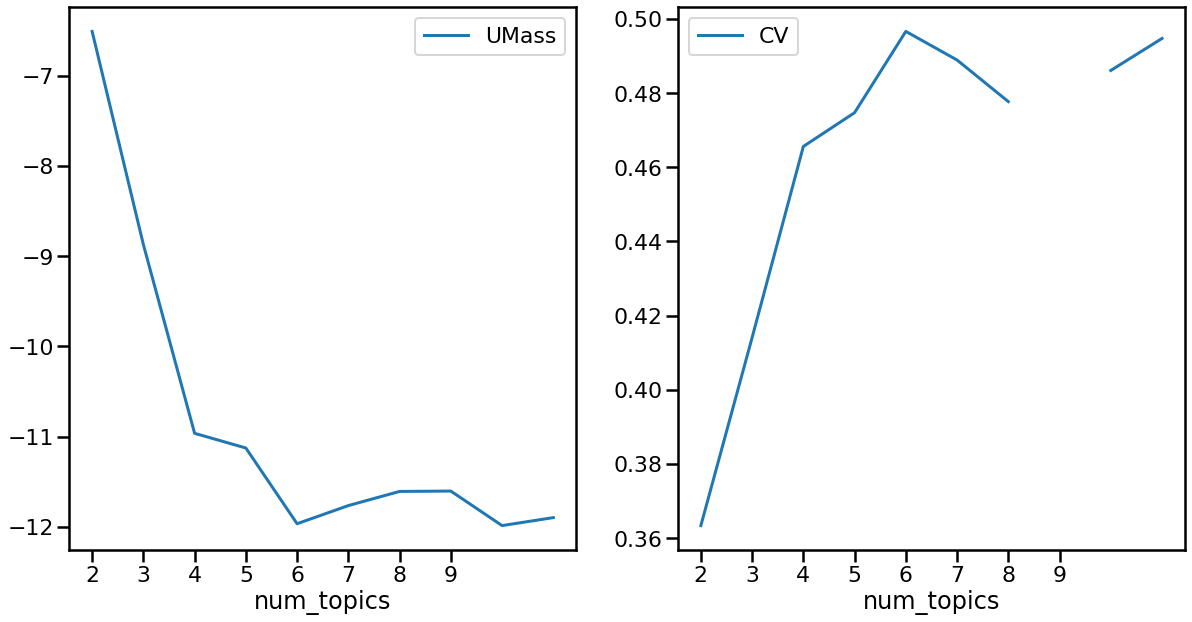

In [43]:
seaborn.set_context('poster') # use large font


scores = pd.DataFrame(coherence_values, columns=['num_topics', 'UMass', 'CV'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
scores.plot.line(x='num_topics', y='UMass', ax=ax[0], xticks=range(2,10));
scores.plot.line(x='num_topics', y='CV', ax=ax[1], xticks=range(2,10));


For the actual model, we will use 4 topics as we anticipate rather different styles in the following categories:

1. Hosts (robots) under the leadership of Dolores fighting for destruction of the order
2. Hosts under Maeve wanting to find their own peace
3. Humans defending the park and their own survival
4. Conversations of the thin line between questioning all of the previous 

In [44]:
num_topics = 4

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/200
print(chunk_size)

print("fitting model", flush=True)
model = LdaMulticore(num_topics=num_topics, # number of topics
                     corpus=model_corpus, # what to train on 
                     id2word=dictionary, # mapping from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes, # make this many passes over data
                     chunksize=chunk_size, # update after this many instances
                     alpha=0.1,
                     random_state=42
                    )
    

319.75
fitting model


In [45]:
# transform the data into topic distros
topic_corpus = model[model_corpus]

In [46]:
import re

# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=8)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:8]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))

1 "fuck", "find", "look", "dolore", "good", "right", "bring", "wait"
2 "bernard", "world", "way", "understand", "choice", "stop", "work", "ask"
3 "know", "want", "come", "think", "hell", "kill", "hurt", "tell"
4 "host", "time", "let", "shit", "help", "wrong", "leave", "need"


<center> When considering the previously anticipated topics, it seems that **one topic** is centering around the deeper conversations about the meaning of the struggle depicted in the show (topic including words like "world", "way", "understand"). **Another topic** would be concentrated around the action dialogues with swear words and words like "find","look" etc.. Furthermore, **another topic**, including words like "know","want","think" is center around the hosts trying to find out what is the actual truth of their world. The **last topic** looks centered around words such as "host","time","leave" might be connected to the people struggling to leave the park and defend against the hosts. 

 ### <center> 2.2.2. Aggregating topics by a dependent variable

In this part of the code, we are looking into the usage of the topics over the two main categories being humans and robots

In [47]:
%%time
target_category = 'human'
# get a list of all the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(len(topic_corpus))]
# turn that into a data frame with N rows and K columns, each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)
# add the review category of each document (so we can aggregate)
topic_distros['category'] = merged[target_category]

Wall time: 2.43 s


In [48]:
topic_distros.category.unique()

array([1, 0], dtype=int64)

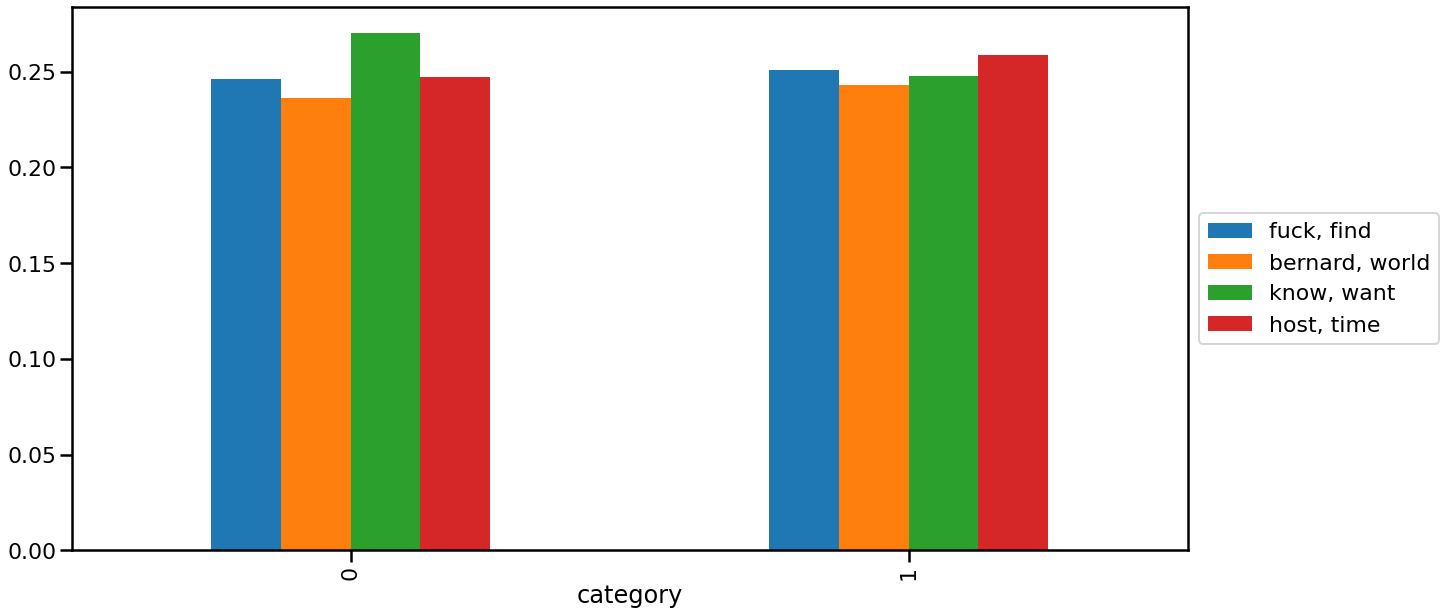

In [49]:
import matplotlib.pyplot as plt # make graphs
import seaborn # make prettier graphs

seaborn.set_context('poster') # use large font

fig, ax = plt.subplots(figsize=(20, 10)) # set graph size
# aggregate topics by categories
aggregate_by_category = topic_distros[topic_distros.category.isin('1 0'.split())]
aggregate_by_category = aggregate_by_category.groupby(aggregate_by_category.category).mean()
# plot the graph
aggregate_by_category[descriptors].plot.bar(ax=ax);
# move the legend out
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

None of the topics seems to be specific for either the robots or the humans, this can be caused by the fact that throughout the show, the conversations are very well balanced and therefore there is a lot of human-robot interaction therefore, none of the topics is specific to one of the groups. Finally, given the results, it seems that the topic inference will not help us to understand whether we can distinguish between human and robot talking, therefore, the predictive models are needed.

### <center> 2.3. Dense word embeddings

Here, we are performing the requested Dense Word Embeddings, in our case, the Doc2Vec. Later, the result is used for clustering purposes to see, whether we are able to separate in space the replicas spoken by a human and a robotic character.

In [59]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import FAST_VERSION
from gensim.models.doc2vec import TaggedDocument
    
documents = [TaggedDocument(train.replica[i], [i]) for i in range(train.shape[0])]
emb_size = 300
print('done')
d2v_model = Doc2Vec(vector_size=emb_size, 
                    window=10,
                    hs=0,
                    sample=0.001,
                    negative=5,
                    min_count=5,
                    workers=-1,
                    epochs=2000,
                    dm=0, 
                    dbow_words=0)

d2v_model.build_vocab(documents)

d2v_model.train(documents, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

done


Here, the necessary split into different dataset is performed for further usage before we get to the clustering of the results.

In [60]:
Xd2v_train = np.array([]).reshape(0, emb_size)
for i in range(train.shape[0]):
    Xd2v_train = np.vstack([Xd2v_train, d2v_model.docvecs[i]])

In [61]:
Xd2v_train.shape

(5267, 300)

In [62]:
Xd2v_dev = np.array([]).reshape(0, emb_size)
for i in range(dev.shape[0]):
    Xd2v_dev = np.vstack([Xd2v_dev, d2v_model.infer_vector([dev.replica[i]])])

In [63]:
Xd2v_dev.shape

(1128, 300)

In [64]:
Xd2v_test = np.array([]).reshape(0, emb_size)
for i in range(test.shape[0]):
    Xd2v_test = np.vstack([Xd2v_test, d2v_model.infer_vector([test.replica[i]])])

In [65]:
Xd2v_test.shape

(1130, 300)

As we can see, the three dataset were split in the same way as previously. Main part of the data was left in the training set as we lack the scale needed.

In [66]:
print('embedded feature matrices shapes: train {}, val {},  test {}'.format(Xd2v_train.shape, Xd2v_dev.shape, Xd2v_test.shape))

embedded feature matrices shapes: train (5267, 300), val (1128, 300),  test (1130, 300)


### <center> 2.4. Clusterization and visualization of embeddings

Before using other methods like KMeans, we use AgglomerativeClustering to establish the right amount of cluster to focus on. It this case, we hope for the ideality of two clusters as we are expecting to see one cluster for humans and one for robots.

2 0.0007863384915609751
3 7.853927067035472e-05
4 -0.000294212883760332
5 -0.000541657548476609
6 -0.0008333490798035319
7 -0.0008330804250270446
8 -0.0011192988146310437
9 -0.0013329001737408127
10 -0.0015117223180349199
11 -0.0015788311983379658
12 -0.0018185715583197673
13 -0.0017956802750487386
14 -0.002091786060009009


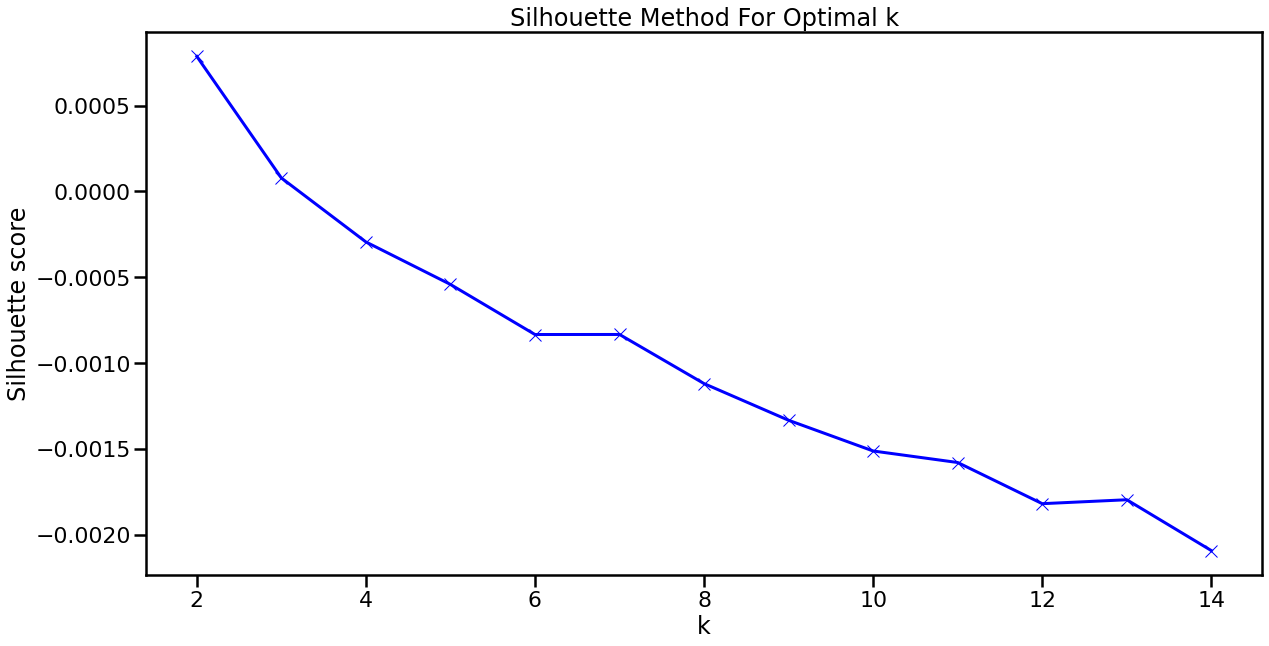

In [67]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import seaborn as sb

silhouettes = []

K = range(2, 15)

for c in K:
    agg_clustering = AgglomerativeClustering(n_clusters=c)
    agg_cluster_ids = agg_clustering.fit_predict(Xd2v_train)
    score = silhouette_score(Xd2v_train, agg_cluster_ids)
    silhouettes.append(score)
    print(c, score)
    
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method For Optimal k')
plt.show()

Two clusters proved to be optimal so we will further keep this number and reuse it for further analysis

###  <center> 2.4.1. AgglomerativeClustering

As a first task, we use the previous result to perform Agglomerative Clustering once for the initial visualisation of the resulting clusters of replicas.

In [68]:
from sklearn.cluster import KMeans, AgglomerativeClustering
k = 2
agg = AgglomerativeClustering(n_clusters=k)

In [69]:
%time agg_sample_ids = agg.fit_predict(Xd2v_train)

Wall time: 5.14 s


In [70]:
agg_sample_ids

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import seaborn as sb

sb.set_context('notebook')

def plot_vectors(vectors, title='VIZ', labels=None, dimensions=3, elev = 25., azim = 250):
    """
    plot the vectors in 2 or 3 dimensions. 
    If labels are supplied, use them to color the data accordingly
    """
    # set up graph
    fig = plt.figure(figsize=(10,10))

    # create data frame
    df = pd.DataFrame(data={'x':vectors[:,0], 'y': vectors[:,1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
    else:
        df['label'] = [''] * len(df)

    # assign colors to labels
    cm = plt.get_cmap('afmhot') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1. * i/n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
        
    # plot in 3 dimensions
    if dimensions == 3:
        # add z-axis information
        df['z'] = vectors[:,2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        ax.view_init(elev=elev, azim=azim)
        
        frame1 = plt.gca() 
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])

        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            color_values = [label_colors[l]] * len(df2)
            ax.scatter(df2['x'], df2['y'], df2['z'], 
                       c=color_values, 
                       cmap=cMap, 
                       edgecolor=None, 
                       label=label, 
                       alpha=0.4, 
                       s=100)
      
    # plot in 2 dimensions
    elif dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca() 
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])

        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            color_values = [label_colors[l]] * len(df2)
            ax.scatter(df2['x'], df2['y'], 
                       c=color_values, 
                       cmap=cMap, 
                       edgecolor=None, 
                       label=label, 
                       alpha=0.4, 
                       s=100)

    else:
        raise NotImplementedError()

    plt.title(title)
    plt.legend()
    plt.show()

First, we plot the result in 3D for the two found clusters

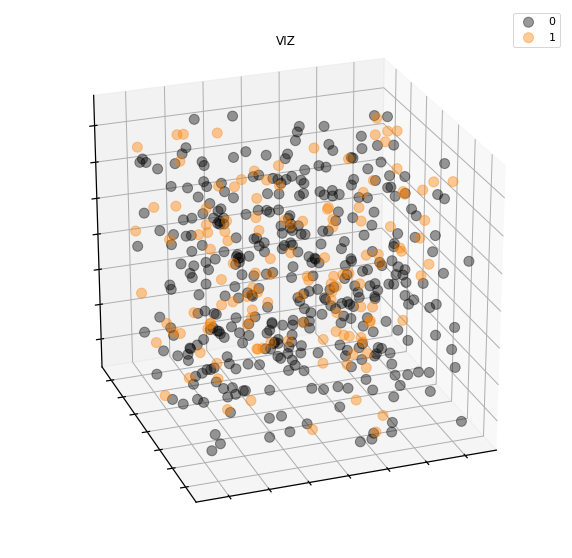

In [72]:
np.random.seed(10)
plot_sample = np.random.choice(len(Xd2v_train), replace=False, size=500)
plot_vectors(Xd2v_train[plot_sample], labels=agg_sample_ids[plot_sample], elev = 25. , azim = 250)

It seems that in 3D there is no visible separation of the clusters that was established in the higher dimensions.

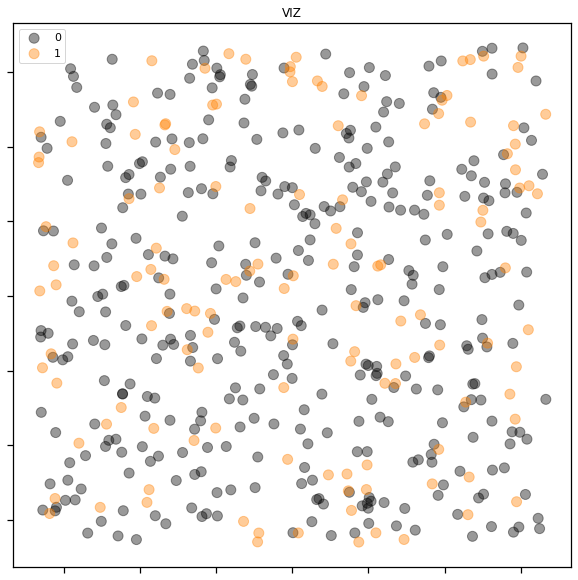

In [73]:
plot_vectors(Xd2v_train[plot_sample], labels=agg_sample_ids[plot_sample], dimensions=2)

2D shows very much non-separated similar results and we therefore turn to other methods of clustering.

### <center> 2.4.2 KMeans

Now let's try to clusterize the data with the same number of clusters using KMeans:

In [74]:
km = KMeans(n_clusters=k, 
            n_jobs=-1, algorithm = "elkan", init = "k-means++")

# fit it on the full 100-dimensional data set
%time km.fit(Xd2v_train)

Wall time: 3.52 s


KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We will again try to plot the results in the 3D 

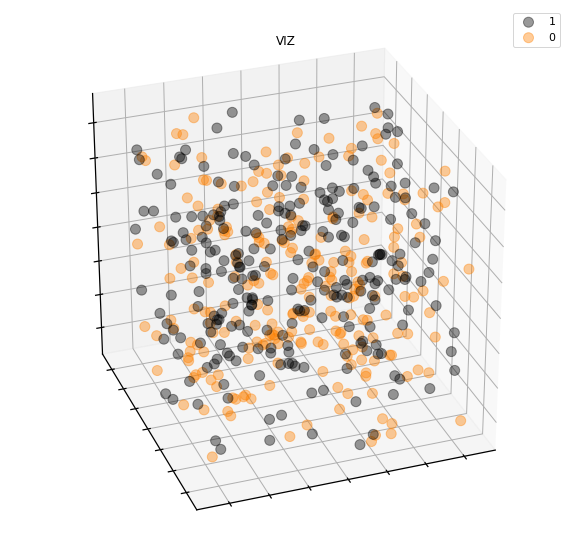

In [75]:
np.random.seed(10)
plot_sample = np.random.choice(len(Xd2v_train), replace=False, size=500)
plot_vectors(Xd2v_train[plot_sample], labels=km.labels_[plot_sample], elev = 30. , azim = 250)

It again seems that, at least in the center, there is no visible division of the clusters. Let's try 2D dimensions:

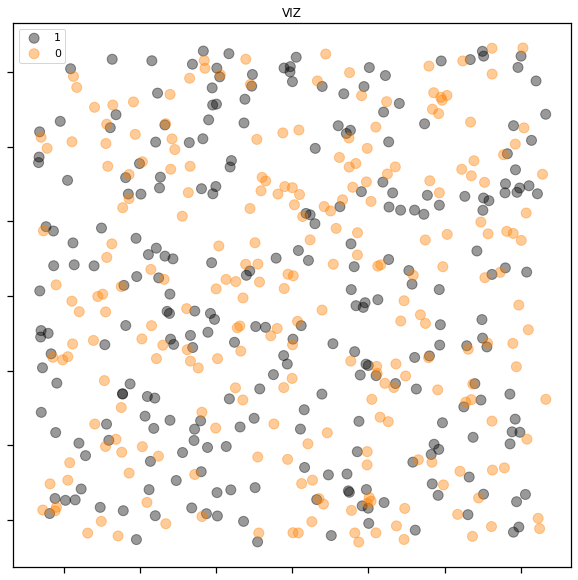

In [76]:
plot_vectors(Xd2v_train[plot_sample], labels=km.labels_[plot_sample], dimensions=2)

It again seems that is lower number of dimensions, the clusters are not very well separated

### <center> 2.4.3. DBSCAN

As the two previous methods did not show the separation in lower dimensional spaces, in this section, we try Density Based Spatial Clustering of Applications with Noise.

First we look at distances between the points and the cluster centers to understand the usability of the DBSCAN method on your data. 

In [77]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
X_trainsc = scaler.fit_transform(Xd2v_train)
X_devsc = scaler.transform(Xd2v_dev)

In [79]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_trainsc)
distances, indices = nbrs.kneighbors(X_trainsc)

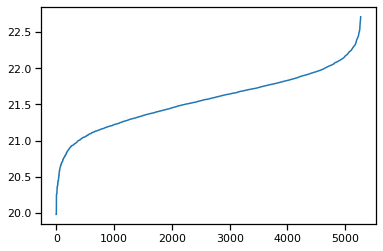

In [80]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

We see that most of our data have a very small distance between each other, therefore are very much evenly distributed over the space.

Now, we try to implement the DBSCAN that allows the clusters to have non convex shapes.

In [81]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(metric='euclidean', eps=6.6, min_samples=3, n_jobs=-1, algorithm='kd_tree')
cluster_labels = dbscan.fit_predict(X_trainsc)
print(np.unique(cluster_labels))

[-1]


No matter what "eps" we choose (value of what should still be considered as noise by the algorithm) DBSCAN always ends up with only one major label and therefor one main cluster. The finding potentially corresponds with the evenly distributed distances between the points we have seen earlier.

We further evaluate whether the assumption is right.

In [82]:
from sklearn.manifold import TSNE
#perplexity ~sqrt(N)
tsne = TSNE(n_components=2, perplexity=53.0, early_exaggeration=100.0, learning_rate=100.0, n_iter=2000, n_iter_without_progress=300, min_grad_norm=1e-05, metric='euclidean', init='random', verbose=0, random_state=42, angle=0.5)
X_proj = tsne.fit_transform(Xd2v_train)

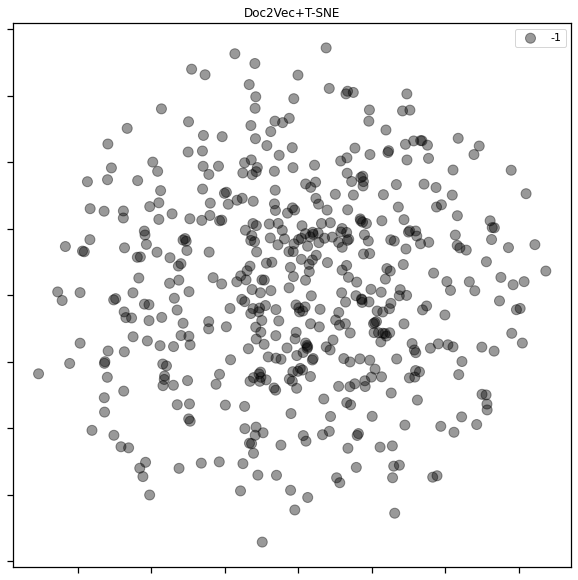

In [83]:
inds = np.random.choice(range(X_proj.shape[0]),size=500, replace=False)
X_samp = X_proj[inds]
plot_vectors(X_samp, title='Doc2Vec+T-SNE', labels=cluster_labels[inds], dimensions=2)

t-SNE method seems to output the same results, let's try one more method to understand what is going on. We use a more automated version of DBSCAN, "HDBSCAN" that does not need the noise evaluation as input.

In [84]:
import hdbscan #I hope its fine to use the library as we have to find a reason for why the data do not give any meaningful result

In [85]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X_trainsc)

C:\Users\Michal\anaconda3second\lib\site-packages\hdbscan\hdbscan_.py:219: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  'the full minimum spanning tree ', UserWarning)


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

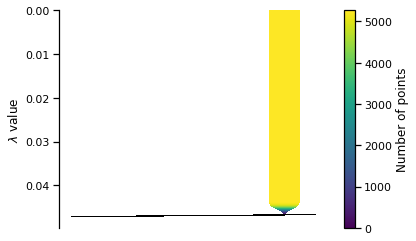

In [86]:
clusterer.condensed_tree_.plot(max_rectangles_per_icicle= 1000)

The HDBSCAN method again clusters all the points immediatly after the beginning of the algorithm and therefore we see that the dataset as-is is impossible to reliably separate into more evenly sized clusters.

## <center> 3. Prediction

After the initial analysis of topics and clusters found in data, we will now focus on our main research question. We further examine if we are able to predict whether the replica was told by a human or one of the hosts from the show.

Let's look at the label distributions in the datasets we use for the prediction

In [217]:
print('in train: {} humans and {} ai'.format(sum(y_train), sum(1-y_train)))

in train: 2786 humans and 2481 ai


In [218]:
print('in dev: {} humans and {} ai'.format(sum(y_dev), sum(1-y_dev)))

in dev: 599 humans and 529 ai


In [219]:
print('in test: {} humans and {} ai'.format(sum(y_test), sum(1-y_test)))

in test: 616 humans and 514 ai


## <center> 3.1. Transforming the Input

First, we transform the input into numerical values needed for the predictive models that are deployed further.

In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [221]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), 
                             min_df=3, 
                             max_df=0.7, 
                             analyzer='word')

X_train = vectorizer.fit_transform(train['replica'])
print(X_train.shape)

(5267, 1381)


In [222]:
X_dev = vectorizer.transform(dev['replica'])
X_test = vectorizer.transform(test['replica'])
print(X_dev.shape, X_test.shape)

(1128, 1381) (1130, 1381)


## <center> 3.2. Prediction techniques

In this section, we introduce several different techniques with which we try to understand whether we are able to distinguish the humans and robots. First, the mandatory Baseline and Logistic Regression are used. After, Random Forest, two CNN architectures (VGG16 and more less complex), LSTM, BiLSTM and HAN models are run to predict the desired variable.

### <center> 3.2.1. Dummy Baseline

As a first method, Baseline created by the usage of frequency of the two values of our binary variable is used to see the performance.

In [223]:
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

most_frequent = DummyClassifier(strategy='most_frequent')
most_frequent.fit(X_train, y_train)
dumb_predictions = most_frequent.predict(X_test)
print(classification_report(y_test, dumb_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       514
           1       0.55      1.00      0.71       616

    accuracy                           0.55      1130
   macro avg       0.27      0.50      0.35      1130
weighted avg       0.30      0.55      0.38      1130



C:\Users\Michal\anaconda3second\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see that our Baseline prediction on the binary variable is performing slightly better than a random toss of a coin. Also the bootstrap method is used as requested.

In [243]:
def bootstrap_dummy(df_X_train, df_y_train, df_X_test, df_y_test, runs): 
    
    results_accuracy = []
    
    for i in range(runs): 
        
        pick_train = np.random.randint(df_X_train.shape[0], size=int(df_X_train.shape[0]))
        pick_test = np.random.randint(df_X_test.shape[0], size=int(df_X_test.shape[0]))
    
        bootstraped_X_train = df_X_train[pick_train]
        bootstraped_y_train = pd.DataFrame(df_y_train).iloc[pick_train]
        bootstraped_X_test = df_X_test[pick_test]
        bootstraped_y_test = pd.DataFrame(df_y_test).iloc[pick_test]
    
        most_frequent = DummyClassifier(strategy='most_frequent')
        most_frequent.fit(bootstraped_X_train, bootstraped_y_train)
        dumb_predictions = most_frequent.predict(bootstraped_X_test)
        print(most_frequent.score(bootstraped_X_test, bootstraped_y_test))
        
        results_accuracy.append(most_frequent.score(bootstraped_X_test, bootstraped_y_test))
        
    return results_accuracy
    
bs_dummy = bootstrap_dummy(X_train, y_train, X_test, y_test, runs = 10)

0.5486725663716814
0.5336283185840708
0.5513274336283186
0.5371681415929204
0.5654867256637168
0.5513274336283186
0.5716814159292035
0.5327433628318584
0.5451327433628319
0.5433628318584071


The results are used later to carry out the statistical significance testing.

### <center> 3.2.2. LogReg Classifier

Furthermore, we proceed to a bit more elaborate tool, Logistic Regression that will serve as a second baseline on the dataset before we start addressing the problem with more advanced tools.

In [225]:
from sklearn.linear_model import LogisticRegression

### <center>3.2.2.1. Tf_Idf features

In [226]:
classifier = LogisticRegression(n_jobs=-1, multi_class='ovr', solver='lbfgs')
%time classifier.fit(X_train, y_train)
print(classifier)

Wall time: 6 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [227]:
predictions = classifier.predict(X_dev)
print(classification_report(y_dev, predictions))

              precision    recall  f1-score   support

           0       0.57      0.58      0.57       529
           1       0.62      0.62      0.62       599

    accuracy                           0.60      1128
   macro avg       0.60      0.60      0.60      1128
weighted avg       0.60      0.60      0.60      1128



With Logistic Regression, the accuracy of the prediction raised to around 60% on the test set, being 10% better than the random toss of a coin.

### <center> 3.2.2.1.1. Regularization strength + balanced classes

Furthermore, we try to improve the performance of the Logistic Regression by an iteration over a regulation strength.

In [228]:
from sklearn.metrics import f1_score
best_c = None
best_performance = 0.0

for c in [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100, 1000, 10000]:
    print(c)
    classifier_c = LogisticRegression(n_jobs=-1, multi_class='ovr', solver='lbfgs', C=c)
    classifier_c.fit(X_train, y_train)
    predictions_c = classifier_c.predict(X_dev)
    score = f1_score(y_dev, predictions_c, average='micro')
    if score > best_performance:
        best_performance = score
        best_c = c
        print("New best performance: {}".format(score))
        
    print(classification_report(y_dev, predictions_c))
    print()

0.0001
New best performance: 0.5310283687943262
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       529
           1       0.53      1.00      0.69       599

    accuracy                           0.53      1128
   macro avg       0.27      0.50      0.35      1128
weighted avg       0.28      0.53      0.37      1128


0.001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       529
           1       0.53      1.00      0.69       599

    accuracy                           0.53      1128
   macro avg       0.27      0.50      0.35      1128
weighted avg       0.28      0.53      0.37      1128


0.01
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       529
           1       0.53      1.00      0.69       599

    accuracy                           0.53      1128
   macro avg       0.27      0.50      0.35      1128
weighted avg 

Let's use just the best regularization constant to see the best result.

In [229]:
classifier_c = LogisticRegression(n_jobs=-1, multi_class='ovr', solver='lbfgs',
                                         C = best_c)
classifier_c.fit(X_train, y_train)

predictions_c_test = classifier_c.predict(X_test)

print(classification_report(y_test, predictions_c_test))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58       514
           1       0.65      0.65      0.65       616

    accuracy                           0.62      1130
   macro avg       0.62      0.62      0.62      1130
weighted avg       0.62      0.62      0.62      1130



The accuracy stayed around 60% on the test set. Therefore, with the coming methods, we try to beat this prediction score. Before we get to the more advanced tools, we test the robustness of the prediction by using the same data but processed through Glove instead of TFIDF.

### <center> 3.2.2.2. Glove features

In [230]:
classifier = LogisticRegression(n_jobs=-1, multi_class='ovr', solver='lbfgs')
%time classifier.fit(train_gloveembs, y_train)
print(classifier)

Wall time: 4.09 s
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [231]:
predictions = classifier.predict(dev_gloveembs)
print(classification_report(y_dev, predictions))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56       529
           1       0.61      0.60      0.61       599

    accuracy                           0.59      1128
   macro avg       0.58      0.58      0.58      1128
weighted avg       0.59      0.59      0.59      1128



As the results, we see slightly worse performance than with the TFIDF features. Further, as before, We check for better regularization constant.

### <center> 3.2.2.2.1. Regularization strength + balanced classes

In [232]:
from sklearn.metrics import f1_score
best_c = None
best_performance = 0.0

for c in [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100, 1000, 10000]:
    print(c)
    classifier_c = LogisticRegression(n_jobs=-1, multi_class='ovr', solver='lbfgs', class_weight='balanced', C=c)
    classifier_c.fit(train_gloveembs, y_train)
    predictions_c = classifier_c.predict(dev_gloveembs)
    score = f1_score(y_dev, predictions_c, average='micro')
    if score > best_performance:
        best_performance = score
        best_c = c
        print("New best performance: {}".format(score))
        
    print(classification_report(y_dev, predictions_c))
    print()

0.0001
New best performance: 0.575354609929078
              precision    recall  f1-score   support

           0       0.54      0.70      0.61       529
           1       0.64      0.47      0.54       599

    accuracy                           0.58      1128
   macro avg       0.59      0.58      0.57      1128
weighted avg       0.59      0.58      0.57      1128


0.001
New best performance: 0.5975177304964538
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       529
           1       0.66      0.51      0.57       599

    accuracy                           0.60      1128
   macro avg       0.61      0.60      0.60      1128
weighted avg       0.61      0.60      0.59      1128


0.01
              precision    recall  f1-score   support

           0       0.56      0.66      0.61       529
           1       0.64      0.54      0.59       599

    accuracy                           0.60      1128
   macro avg       0.60    

In [233]:
classifier_c = LogisticRegression(n_jobs=-1, multi_class='ovr', solver='lbfgs', class_weight='balanced',
                                         C = best_c)
classifier_c.fit(train_gloveembs, y_train)

predictions_c_test = classifier_c.predict(test_gloveembs)

print(classification_report(y_test, predictions_c_test))

              precision    recall  f1-score   support

           0       0.54      0.70      0.61       514
           1       0.67      0.51      0.58       616

    accuracy                           0.60      1130
   macro avg       0.61      0.61      0.60      1130
weighted avg       0.61      0.60      0.60      1130



With this setup we achieve accuracy of 60% for the test set. Result is just slightly worse, than the for the TFIDF features. We are again adding the requested bootstrap.

In [244]:
def bootstrap_LogReg(df_X_train, df_y_train, df_X_test, df_y_test, runs): 
    
    results_accuracy = []
    
    for i in range(runs): 
        
        pick_train = np.random.randint(df_X_train.shape[0], size=int(df_X_train.shape[0]))
        pick_test = np.random.randint(df_X_test.shape[0], size=int(df_X_test.shape[0]))
    
        bootstraped_X_train = df_X_train[pick_train]
        bootstraped_y_train = pd.DataFrame(df_y_train).iloc[pick_train]
        bootstraped_X_test = df_X_test[pick_test]
        bootstraped_y_test = pd.DataFrame(df_y_test).iloc[pick_test]
    
        classifier = LogisticRegression(n_jobs=-1, multi_class='ovr', solver='lbfgs')
        classifier.fit(bootstraped_X_train, bootstraped_y_train)
        print(classifier)
        
        predictions = classifier.predict(bootstraped_X_test)
        print(classifier.score(bootstraped_X_test, bootstraped_y_test))
        
        results_accuracy.append(classifier.score(bootstraped_X_test, bootstraped_y_test))
        
    return results_accuracy
        
bs_LogReg = bootstrap_LogReg(X_train, y_train, X_test, y_test, runs = 10)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.620353982300885
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.620353982300885
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=Fa

## <center> 3.2.3. Random Forest

With the baseline set, first, we try methods that should be more suitable for low amount of data. Before venturing into the space of different architectures of Neural Networks, we examine the perfomance of random forest.

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack, vstack

### <center> 3.2.3.1. Tf-Idf features

TFIDF and Glove features will be examined for the Random Forests in the search for better performance of our binary variable.

In [104]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), 
                             min_df=3, 
                             max_df=0.7, 
                             analyzer='word')

X_train_merged_tfidf = vectorizer.fit_transform(merged['replica'])
print(X_train_merged_tfidf .shape)

(6395, 1616)


In [105]:
X_testmer = vectorizer.transform(test['replica'])

After preparation of the features, we initiate the Random Forest model with the TFIDF representation of the data. In order to see, if we can beat the baseline

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(6, 30, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

With the random_grid initiated, we try a first method to search for the hyperparameters in order to optimize the performance

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv =5, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_merged_tfidf, y_trainmer)

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_

In order to improve the performance, we use GridSearch to find the optimal parameters for the Random Forest

In [ ]:
#Grid search 
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 12],
    'max_features': ['auto', 'log2'],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [1000, 1100]
}


# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_merged_tfidf , y_trainmer)
#grid_search.best_params_
grid_search.best_params_

In [ ]:
print(grid_search.best_score_)

In [ ]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train_merged_tfidf, y_trainmer)
rf_preds = best_grid.predict(X_testmer)
print(accuracy_score(rf_preds, y_test))

### <center> 3.2.3.2. Glove features

After the TFIDF features, we try to improve the performance with the Glove features further to beat the baseline prediction. The model used further is the same as the one used with TFIDF

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(6, 15, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv =5, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(merged_gloveembs, y_trainmer)

In [ ]:
rf_random.best_params_

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [12, None],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [2],
    'min_samples_split': [10],
    'n_estimators': [150, 175, 200]
}


# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0)

In [ ]:
# Fit the grid search to the data
grid_search.fit(merged_gloveembs, y_trainmer)
#grid_search.best_params_
grid_search.best_params_

In [ ]:
print(grid_search.best_score_)

In [ ]:
best_grid = grid_search.best_estimator_
best_grid.fit(merged_gloveembs, y_trainmer)
rf_preds = best_grid.predict(test_gloveembs)
print(accuracy_score(rf_preds, y_test))

## <center> 3.2.4. SVC

Another try to improve the performance, after using the Random Forest that did not help us the increase the performance as much as was intended, before going into Neural Networks setting is SVC again trained on both TFIDF and Glove representations of the data.

### <center> 3.2.4.1. Tf-Idf features

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto', kernel='linear')

In [ ]:
for c in [0.01, 0.1, 1, 10, 100, 500]:
    clf = SVC(kernel='linear', C = c)
    print(np.mean(cross_val_score(clf, X_train_merged_tfidf, y_trainmer, cv=5)))

We again try to find the ideal hyperparameters through Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly'],
    'gamma': [0.001, 0.1, 1, 10, 'auto']
}

In [ ]:
svc = SVC()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train_merged_tfidf, y_trainmer)
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train_merged_tfidf, y_trainmer)
svc_preds = best_grid.predict(X_testmer)
print(accuracy_score(svc_preds, y_test))

### <center> 3.2.4.2. Glove features

After using the TFIDF that did not improve the performance too much when compared to the other methods used, we try the same SVC model with the Glove features

In [ ]:
from sklearn.svm import SVC

In [ ]:
for c in [0.01, 0.1, 1, 10]:
    clf = SVC(kernel='linear', C = c)
    print(np.mean(cross_val_score(clf, merged_gloveembs, y_trainmer, cv=5)))

In [ ]:
clf = SVC(kernel='linear', C = 0.01)
clf.fit(train_gloveembs, y_train)
svc_preds = clf.predict(test_gloveembs)
print(accuracy_score(svc_preds, y_test))

### <center> 3.2.5. LSTM

In the previous sections, the modelling techniques used were expected to produce better results on the size of the dataset we acquired, nevertheless after just slight increases in the performance when compared to the baseline, we now look into the Neural Networks framework.

In particular, the first technique is a Recurrent Neural Network LSTM.

In [246]:
import tensorflow as tf

In [247]:
import keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers

Here, we are loading all the necessary modules for both RNN and CNN, which is used later in the script

In [248]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, Flatten, TimeDistributed, Convolution1D
from tensorflow.keras.layers import Bidirectional, LSTM, GlobalMaxPooling1D, Reshape,  concatenate
from tensorflow.keras.layers import Dropout, Dense, Activation, MaxPooling1D
from tensorflow.keras.layers import InputLayer, Conv2D
from tensorflow.python.keras import backend as k
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

First, we perform the data preprocessing needed (creation of the vocabulary used by the model, standardizing length of the sentences...).

In [249]:
vocab = set()
for i in train.replica.apply(lambda x: x.split(' ')):
            vocab.update(i)
for i in dev.replica.apply(lambda x: x.split(' ')):
            vocab.update(i)
print(len(vocab))

4671


In [250]:
# map words and tags into ints
PAD = '-PAD-'
UNK = '-UNK-'
word2int = {word: i + 2 for i, word in enumerate(sorted(vocab))}
word2int[PAD] = 0  # special token for padding
word2int[UNK] = 1  # special token for unknown words

In [251]:
def convert2ints(instances):
    result = []
    for words in instances:
        word_ints = [word2int.get(word, 1) for word in words]
        result.append(word_ints)
    return result 

In [252]:
# apply integer mapping
train_instances_int = convert2ints(merged.replica.apply(lambda x: x.split(' ')))
test_instances_int = convert2ints(test.replica.apply(lambda x: x.split(' ')))

In [253]:
train_instances_int[0]

[4658, 2793, 2]

In [254]:
np.percentile(merged.replica.apply(len), 90)

81.0

In [255]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = len(word2int)+1
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 60
# This is fixed.
EMBEDDING_DIM = 300

In [256]:
# add special padding at the end of every instance, up to MAX_LENGTH
X_train = pad_sequences(train_instances_int, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test = pad_sequences(test_instances_int, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [257]:
#we are creatting weight matrix for vocabulary using Glove embedding in order to use it in initializations
embedding_matrix = np.zeros((MAX_NB_WORDS, EMBEDDING_DIM))
for word, i in word2int.items():
    if i>=MAX_NB_WORDS:
        continue
    try:
        embedding_vector = embeddings_dict[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25), EMBEDDING_DIM)
print(embedding_matrix.shape)

(4674, 300)


In [258]:
len(word2int)

4673

In [259]:
X_train[0]

array([4658, 2793,    2,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

In [260]:
#Making sure the dependent variable is binary
y_train = to_categorical(merged.human, 2)
y_test = to_categorical(test.human, 2)

After the preprocessing, we build up the architecture that will be used and we train the model. This first architecture is a simple LSTM layer which has the created embeddings as input and dense layer at the end (that has the two outputs of the binary variable we are predicting).

In [133]:
def train_lstm(X_train, y_train, X_test, y_test, MAX_NB_WORDS, EMBEDDING_DIM, MAX_SEQUENCE_LENGTH, embedding_matrix,
               hidden_units, epochs, batch_size):
    
    print(hidden_units, 'lstm hidden units')
    np.random.seed(42)

    model = Sequential()
    model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, weights=[embedding_matrix]))
    model.add(LSTM(hidden_units, dropout=0.1))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='loss', patience=3, min_delta=0.00001)])
    
    df = pd.DataFrame(history.history)
    df[['val_accuracy', 'accuracy']].plot.line();
    df[['val_loss', 'loss']].plot.line();
    
    loss, accuracy = model.evaluate(X_test, y_test,
                       batch_size=batch_size, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    return loss, accuracy

32 lstm hidden units
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 300)           1405800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 1,448,490
Trainable params: 1,448,490
Non-trainable params: 0
_________________________________________________________________
None
Train on 5755 samples, validate on 640 samples
Epoch 1/3
5755/5755 [==============================] - 14s 2ms/sample - loss: 0.6951 - accuracy: 0.5164 - val_loss: 0.6863 - val_accuracy: 0.5562
Epoch 2/3
5755/5755 [==============================] - 9s 2ms/sample - loss: 0.6928 - accuracy: 0.5218 - val_loss: 0.6871 - val_accuracy: 0.5562
Epoch 3/3


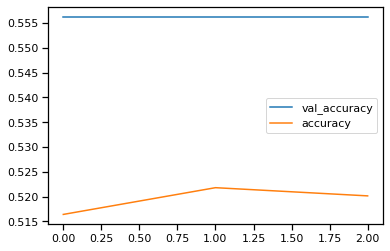

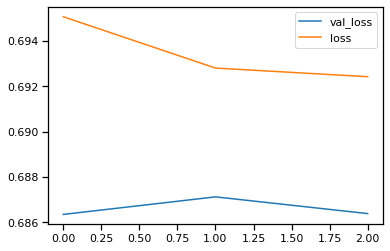

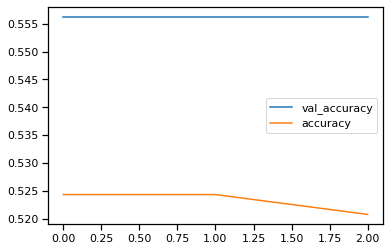

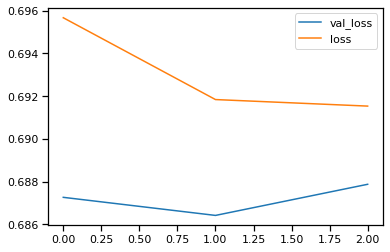

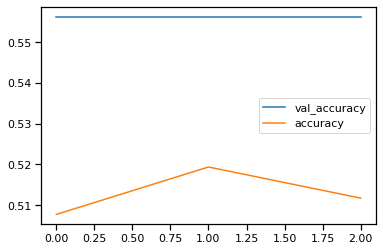

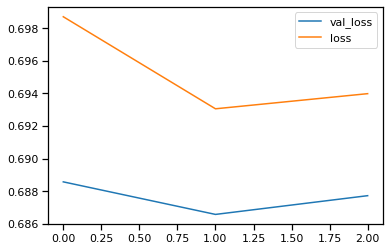

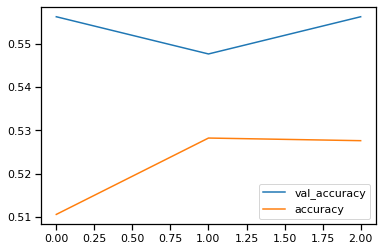

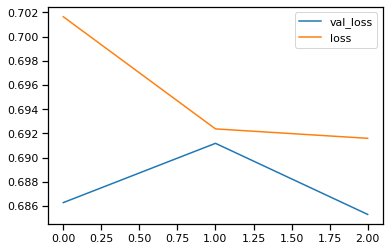

In [138]:
losses = []
accs = []
units = [32, 64, 128, 256]
for u in units:
    l, a = train_lstm(X_train, y_train, X_test, y_test, MAX_NB_WORDS, EMBEDDING_DIM, MAX_SEQUENCE_LENGTH, embedding_matrix,
               u, 3, 64)
    accs += [a]
    losses += [l]

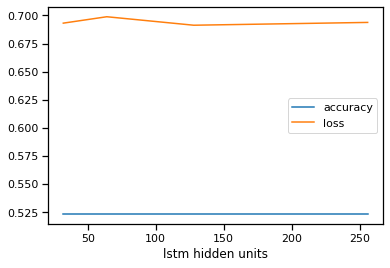

In [139]:
plt.plot(units, accs, label = "accuracy")
plt.plot(units, losses, label = "loss")
plt.xlabel('lstm hidden units')
plt.legend()
plt.show()

The test accuracy of slightly above 50% is very similar to the ones observed with the previous models and therefore, next we try to implement more elaborate Neural Network techniques.

### <center> 3.2.6. BiLSTM

After the previous low performance of the one-directional LSTM, next we implement architecture with bidirectional LSTM in order to improve the results.

The architecture consists of the embeddings created before, the bidirectional LSTM, droupout layer and the dense layer with 2 outputs for our binary variable of whether the character is or is not human.

In [262]:
def train_bilstm(X_train, y_train, X_test, y_test, MAX_NB_WORDS, EMBEDDING_DIM, MAX_SEQUENCE_LENGTH, embedding_matrix,
               hidden_units, epochs, batch_size):
    print(hidden_units, 'lstm hidden units')
    np.random.seed(42)

    model = Sequential()
    model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, mask_zero=True, weights=[embedding_matrix]))
    model.add(Bidirectional(LSTM(256, recurrent_dropout=0.2), merge_mode='concat'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
    
    acc = pd.DataFrame(history.history)
    acc[['val_accuracy', 'accuracy']].plot.line();
    acc[['val_loss', 'loss']].plot.line();
        
    loss, accuracy = model.evaluate(X_test, y_test,
                       batch_size=batch_size, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    
    return loss, accuracy

In [261]:
bilstm_X_train = X_train
bilstm_y_train = y_train
bilstm_X_test = X_test
bilstm_y_test = y_test

32 lstm hidden units
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 60, 300)           1405800   
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               1140736   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 2,547,562
Trainable params: 2,547,562
Non-trainable params: 0
_________________________________________________________________
None
Train on 5755 samples, validate on 640 samples
Epoch 1/3
5755/5755 [==============================] - 155s 27ms/sample - loss: 0.6914 - accuracy: 0.5388 - val_loss: 0.6893 - val_accuracy: 0.5289
Epoch 2/3
5755/5755 [

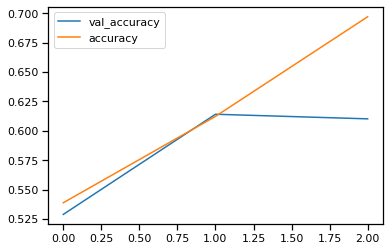

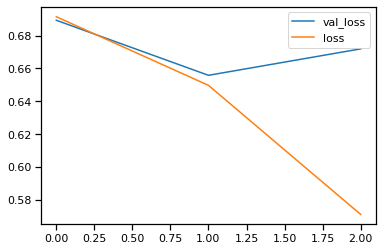

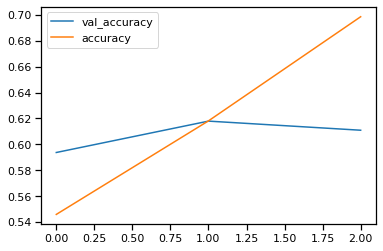

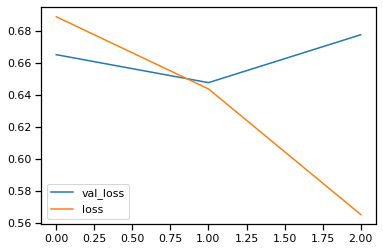

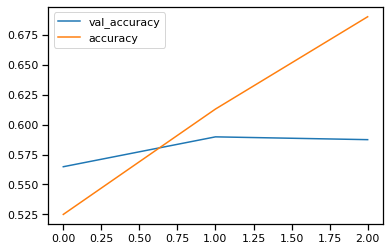

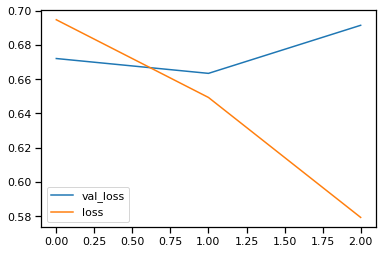

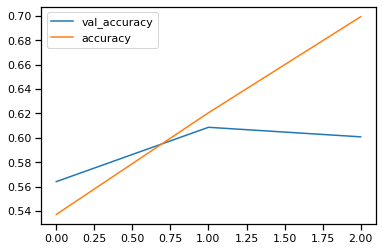

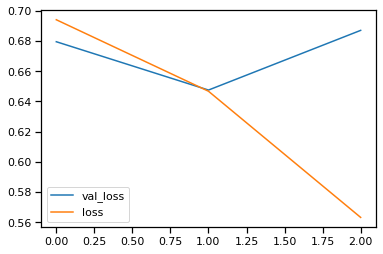

In [144]:
losses = []
accs = []
units = [32, 64, 128, 256]
for u in units:
    l, a = train_bilstm(X_train, y_train, X_test, y_test, MAX_NB_WORDS, EMBEDDING_DIM, MAX_SEQUENCE_LENGTH, embedding_matrix,
               u, 3, 64)
    accs += [a]
    losses += [l]

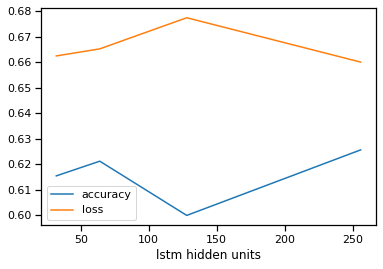

In [145]:
plt.plot(units, accs, label = "accuracy")
plt.plot(units, losses, label = "loss")
plt.xlabel('lstm hidden units')
plt.legend()
plt.show()

Finally, with this model we were able to get at least over the 60% boundary with the accuracy of 63% on the test set. As this was our best performing model, we immedialy try the bootstrap for this method.

256 lstm hidden units
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 60, 300)           1402200   
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 512)               1140736   
_________________________________________________________________
dropout_47 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 2)                 1026      
Total params: 2,543,962
Trainable params: 2,543,962
Non-trainable params: 0
_________________________________________________________________
None
Train on 5755 samples, validate on 640 samples
Epoch 1/3
5755/5755 [==============================] - 288s 50ms/sample - loss: 0.6808 - accuracy: 0.5624 - val_loss: 0.6436 - val_accuracy: 0.6297
Epoch 2/3
5755/5755

5755/5755 [==============================] - 293s 51ms/sample - loss: 0.6878 - accuracy: 0.5557 - val_loss: 0.6697 - val_accuracy: 0.5797
Epoch 2/3
5755/5755 [==============================] - 286s 50ms/sample - loss: 0.5875 - accuracy: 0.6871 - val_loss: 0.5720 - val_accuracy: 0.6984
Epoch 3/3
5755/5755 [==============================] - 306s 53ms/sample - loss: 0.4353 - accuracy: 0.7957 - val_loss: 0.5192 - val_accuracy: 0.7469
Test loss: 0.7851463114265848
Test accuracy: 0.59646016
256 lstm hidden units
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 60, 300)           1402200   
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 512)               1140736   
_________________________________________________________________
dropout_53 (Dropout)         (None, 512)               0         
___

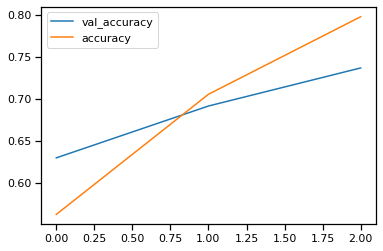

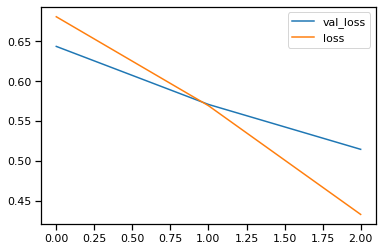

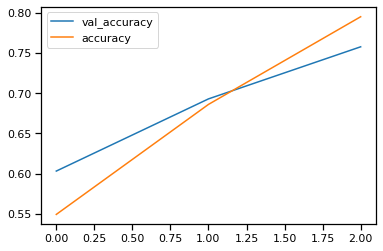

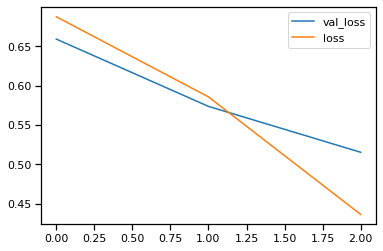

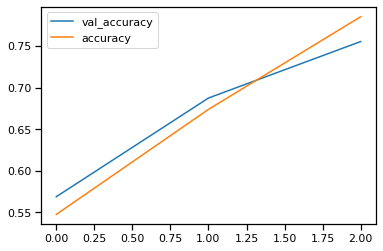

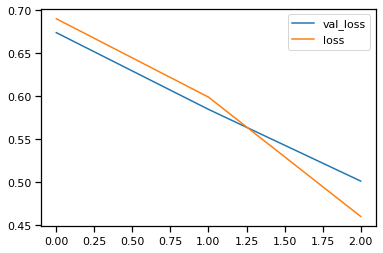

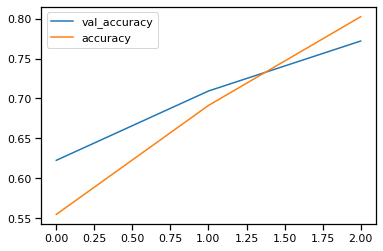

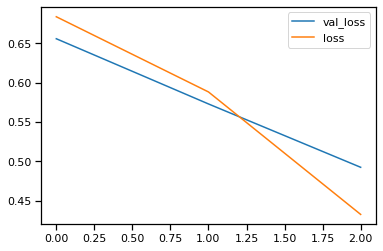

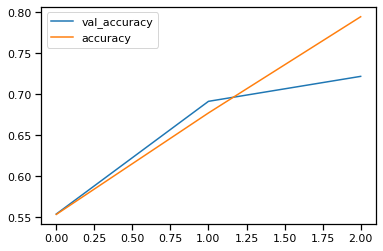

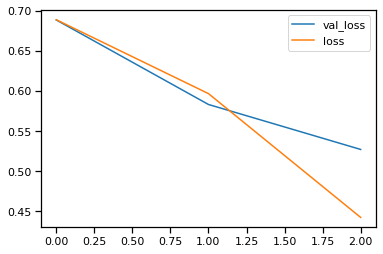

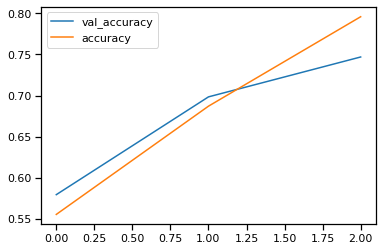

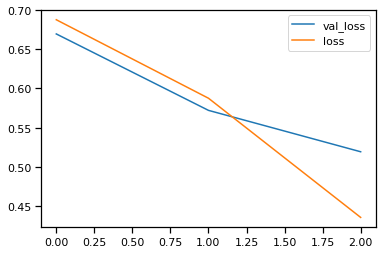

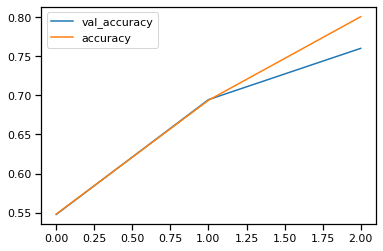

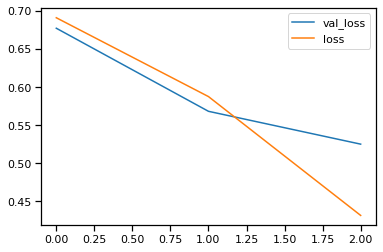

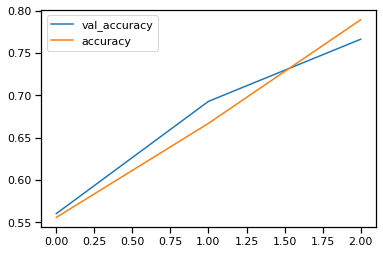

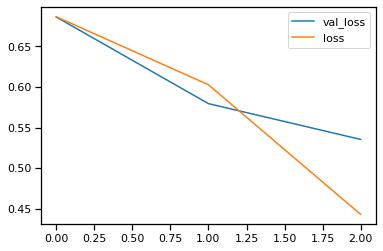

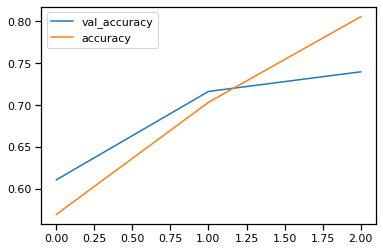

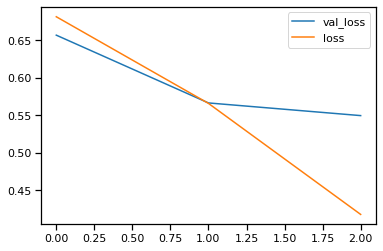

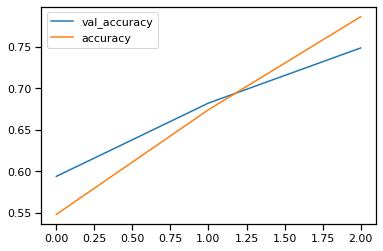

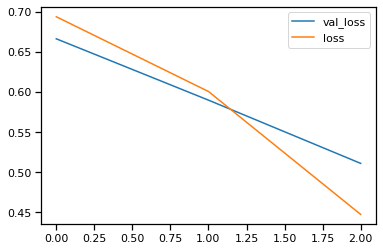

In [266]:
def boostrap_bilstm(df_X_train, df_y_train, df_X_test, df_y_test, runs): 
    
    results_accuracy = []
    
    for i in range(runs): 
        
        pick_train = np.random.randint(df_X_train.shape[0], size=int(df_X_train.shape[0]))
        pick_test = np.random.randint(df_X_test.shape[0], size=int(df_X_test.shape[0]))
    
        bootstraped_X_train = df_X_train[pick_train]
        bootstraped_y_train = pd.DataFrame(df_y_train).iloc[pick_train]
        bootstraped_X_test = df_X_test[pick_test]
        bootstraped_y_test = pd.DataFrame(df_y_test).iloc[pick_test]
    
        loss, accuracy = train_bilstm(bootstraped_X_train, bootstraped_y_train, bootstraped_X_test, bootstraped_y_test, MAX_NB_WORDS, EMBEDDING_DIM, MAX_SEQUENCE_LENGTH, embedding_matrix,
               u, 3, 64)

        results_accuracy.append(accuracy)
        
    return results_accuracy
        
bs_bilstm = boostrap_bilstm(X_train, y_train, X_test, y_test, runs = 10)

In [268]:
import pickle
filename = 'bs_bilstm'
pickle.dump(bs_bilstm, open(filename, 'wb'))

In [269]:
bs_bilstm = pickle.load(open("bs_bilstm", 'rb'))

In [273]:
from scipy.stats import ttest_ind

ttest,pval = ttest_ind(bs_dummy,bs_bilstm)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

ttest,pval = ttest_ind(bs_bilstm,bs_LogReg)
print("p-value",pval)
if pval <0.5:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")



p-value 5.1383893006407296e-08
we reject null hypothesis
p-value 0.6397178656297946
we accept null hypothesis


### <center> 3.2.7. CNN

After trying to improve the performance with the RNN architectures, we try one last improvement with Convolutional Neural Networks to see if we can raise our results on the test set.

And then we use an architecture with one convolutional layer followerd by pooling, dropout and dense layers.

In [146]:
def train_cnn(X_train, y_train, X_test, y_test, MAX_NB_WORDS, EMBEDDING_DIM, MAX_SEQUENCE_LENGTH,
  nb_filter, filter_length, stride_length, hidden_dims = 32, batch_size = 64, epochs = 4):
    model = Sequential()
    model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, mask_zero=True))
    model.add(Convolution1D(filters=nb_filter,  # Number of filters to use
                    kernel_size=filter_length, # n-gram range of each filter.
                    padding='same',  #valid: don't go off edge; same: use padding before applying filter
                    activation='relu',
                    strides=stride_length))
    model.add(Activation(activation='tanh'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.2))
    model.add(Dense(hidden_dims, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='relu'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split = 0.1)
    loss, accuracy = model.evaluate(X_test, y_test,
                       batch_size=batch_size, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    print('nb_filter', nb_filter, 'filter_length', filter_length, 'stride_length', stride_length, 'acc:', accuracy)
    
    return loss, accuracy

In [147]:
losses = []
accs = []
for nb_filter in [16, 32, 64]:
    for filter_length in [2, 3, 4]:
        for stride_length in [1,2]:
            train_cnn(X_train, y_train, X_test, y_test, MAX_NB_WORDS, EMBEDDING_DIM, MAX_SEQUENCE_LENGTH,
  nb_filter, filter_length, stride_length)

Train on 5755 samples, validate on 640 samples
Epoch 1/4
5755/5755 [==============================] - 7s 1ms/sample - loss: 0.9370 - accuracy: 0.5061 - val_loss: 0.6919 - val_accuracy: 0.5344
Epoch 2/4
5755/5755 [==============================] - 4s 725us/sample - loss: 0.7208 - accuracy: 0.5271 - val_loss: 0.6836 - val_accuracy: 0.5570
Epoch 3/4
5755/5755 [==============================] - 6s 1ms/sample - loss: 0.6739 - accuracy: 0.5880 - val_loss: 0.6818 - val_accuracy: 0.5602
Epoch 4/4
5755/5755 [==============================] - 5s 818us/sample - loss: 0.6122 - accuracy: 0.6678 - val_loss: 0.7106 - val_accuracy: 0.5813
Test loss: 0.7048698429512766
Test accuracy: 0.5738938
nb_filter 16 filter_length 2 stride_length 1 acc: 0.5738938
Train on 5755 samples, validate on 640 samples
Epoch 1/4
5755/5755 [==============================] - 5s 910us/sample - loss: 1.1667 - accuracy: 0.5084 - val_loss: 0.6961 - val_accuracy: 0.5180
Epoch 2/4
5755/5755 [==============================] - 4s 72

Train on 5755 samples, validate on 640 samples
Epoch 1/4
5755/5755 [==============================] - 7s 1ms/sample - loss: 0.7639 - accuracy: 0.5096 - val_loss: 0.6879 - val_accuracy: 0.5555
Epoch 2/4
5755/5755 [==============================] - 5s 934us/sample - loss: 0.6782 - accuracy: 0.5743 - val_loss: 0.6626 - val_accuracy: 0.5961
Epoch 3/4
5755/5755 [==============================] - 4s 771us/sample - loss: 0.5989 - accuracy: 0.6880 - val_loss: 0.6656 - val_accuracy: 0.6055
Epoch 4/4
5755/5755 [==============================] - 4s 732us/sample - loss: 0.5113 - accuracy: 0.7718 - val_loss: 0.8905 - val_accuracy: 0.5930
Test loss: 0.8688884222401981
Test accuracy: 0.5933628
nb_filter 32 filter_length 4 stride_length 2 acc: 0.5933628
Train on 5755 samples, validate on 640 samples
Epoch 1/4
5755/5755 [==============================] - 6s 1ms/sample - loss: 4.4653 - accuracy: 0.4972 - val_loss: 4.6197 - val_accuracy: 0.5172
Epoch 2/4
5755/5755 [==============================] - 5s 84

We see that with this inital CNN architecture, we got results inferior to the BiLSTM used before on the same test set.

Therefore, we turn to more complex CNN architectures, with more convolutional layers, and try what used to be the state-of-the-art architecture, the VGG16.

### <center> 3.2.8. CNN - VGG architecture

The VGG16 architecture composes of more blocks of convolutional layers connected through pooling layers. After the convolutions, three dense layers and two dropout layers are applied.

In [148]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers import MaxPooling1D, Dropout, Flatten
from keras.layers.core import Dense, Activation
import numpy as np

np.random.seed(42)

# set parameters of matrices and convolution
embedding_dim = 64
nb_filter = 64
filter_length = 3
hidden_dims = 32
stride_length = 1

inputs = Input((30, ), 
               name='word_IDs')

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=nb_filter,kernel_size = filter_length, padding="same", activation="relu"))
model.add(Conv1D(filters=nb_filter,kernel_size=filter_length,padding="same", activation="relu"))
model.add(MaxPooling1D())
model.add(Conv1D(filters=nb_filter*2, kernel_size=filter_length, padding="same", activation="relu"))
model.add(Conv1D(filters=nb_filter*2, kernel_size=filter_length, padding="same", activation="relu"))
model.add(MaxPooling1D())
model.add(Conv1D(filters=nb_filter*4, kernel_size=filter_length, padding="same", activation="relu"))
model.add(Conv1D(filters=nb_filter*4, kernel_size=filter_length, padding="same", activation="relu"))
model.add(Conv1D(filters=nb_filter*4, kernel_size=filter_length, padding="same", activation="relu"))
model.add(MaxPooling1D())
model.add(Conv1D(filters=nb_filter*8, kernel_size=filter_length, padding="same", activation="relu"))
model.add(Conv1D(filters=nb_filter*8, kernel_size=filter_length, padding="same", activation="relu"))
model.add(Conv1D(filters=nb_filter*8, kernel_size=filter_length, padding="same", activation="relu"))
model.add(MaxPooling1D())
model.add(Conv1D(filters=nb_filter*8, kernel_size=filter_length, padding="same", activation="relu"))
model.add(Conv1D(filters=nb_filter*8, kernel_size=filter_length, padding="same", activation="relu"))
model.add(Conv1D(filters=nb_filter*8, kernel_size=filter_length, padding="same", activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation="softmax"))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 300)           1405800   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 64)            57664     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 60, 64)            12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 30, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 30, 128)           24704     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 30, 128)           49280     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 15, 128)          

In [149]:
batch_size = 64
epochs = 10

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split = 0.1
                   )

C:\Users\Michal\anaconda3second\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5755 samples, validate on 640 samples
Epoch 1/10
5755/5755 [==============================] - 114s 20ms/step - loss: 0.6920 - accuracy: 0.5293 - val_loss: 0.6886 - val_accuracy: 0.5562
Epoch 2/10
 576/5755 [==>...........................] - ETA: 1:46 - loss: 0.6896 - accuracy: 0.5469

KeyboardInterrupt: 

In [150]:
loss, accuracy = model.evaluate(X_test, y_test,
                                batch_size=batch_size,
                                verbose=False)

print("\nTesting Accuracy:  {:.4f}".format(accuracy))


Testing Accuracy:  0.5230


As we can see from the outcome, the VGG16 architecture, originaly designed for image recognition, does not in our case significantly improve the performance.

### <center> 3.2.9. HAN

The final attempt to improve the performance is this implementation of the Hierarchical Attention Networks model in the cells below.

In [ ]:
from han import HAN
import pickle

In [ ]:
max_features = 5000
maxlen_sentence = 10
maxlen_word = 10
batch_size = 32
embedding_dims = 50
epochs = 10

In [ ]:
y_train = np.array(train_merged.human)
y_test = np.array(test.human)

In [ ]:
print('Loading data...')
print('Pad sequences (samples x #sentence x #word)...')
x_train = pad_sequences(train_instances_int, maxlen=maxlen_sentence * maxlen_word)
x_test = pad_sequences(test_instances_int, maxlen=maxlen_sentence * maxlen_word)
x_train = x_train.reshape((len(x_train), maxlen_sentence, maxlen_word))
x_test = x_test.reshape((len(x_test), maxlen_sentence, maxlen_word))
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

In [ ]:
model = HAN(maxlen_sentence, maxlen_word, max_features, embedding_dims, last_activation='sigmoid', class_num=1)
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
print('Train...')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          callbacks=[early_stopping],
          validation_data=(x_test, y_test))

In [ ]:
predHAN = model.predict(x_test).ravel()

In [ ]:
def prob2int(thresh, probs):
    return [x>thresh for x in probs]

In [ ]:
accuracy_score(list(map(lambda x: round(x), prob2int(0.5, predHAN))), y_test)

## <center> 4. STRUCTURED PREDICTION

For this task, we look at the POS tag prediction of the dataset as the data we gathered do not allow us to dig deeper with more complex task such as complex information extraction as we are operating with short replicas.

In [276]:
from collections import defaultdict, Counter
import json
import re
import numpy as np
import sys
import pickle
import random

np.set_printoptions(precision=2)

users = re.compile('@[^ ]+')
numbers = re.compile('[0-9]')
urls = re.compile("(https?:\/\/)?(?:www\.|(?!www))?[^\s\.]+\.[^\s]{2,}|(www)?\.[^\s]+\.[^\s]{2,}")

For this purpose, a less strict preprocessing is used, because we were loosing too much information needed for this task with the preprocessing used for the rest of the project. Because the results with the restricted number of POS tags used in previous tasks yielded dev accuracy results around 65%, we decided to just lemmatize the replicas and leave the text as-is.

In [277]:
# needed for SP
instances = [[token.lemma_.lower() for token in nlp(sentence)] for sentence in df2.replica]
pos_tags = [[token.pos_ for token in nlp(sentence)] for sentence in df2.replica]
assert len(instances) == len(pos_tags)

We are creating the needed data structure for the Structured perceptron 

In [278]:
# also for SP
X = []
for j in range(len(instances)):
    x = []
    for i in (instances[j]):
        x.append(i)
    X.append(x)

Y = []
for j in range(len(pos_tags)):
    y = []
    for i in (pos_tags[j]):
        y.append(i)
    Y.append(y)
    
a = list(zip(X,Y))
len(a)

7694

And we are using the first version used in class as requested to see the baseline performance.

### <center> 4.1. Structured Perceptron

In [274]:
#BASIC
class StructuredPerceptron(object):
    """
    implements a structured perceptron as described in Collins 2002,
    with updates from https://explosion.ai/blog/part-of-speech-pos-tagger-in-python
    """

    def __init__(self):
        """
        initialize model parameters
        """
        self.tags = set()
        self.feature_weights = defaultdict(lambda: defaultdict(float)) #feature_name -> tags -> weight
        self.weight_totals = defaultdict(lambda: defaultdict(float)) #feature_name -> tags -> weight
        self.timestamps = defaultdict(lambda: defaultdict(float)) #feature_name -> tags -> weight

        self.tag_dict = defaultdict(set) #word -> {tags}

        self.START = "__START__"
        self.END = "__END__"
        
        
    def normalize(self, word):
        """
        lowercase word, and replace numbers, user names, and URLs
        """
        return re.sub(urls, 'URL', re.sub(users, '@USER', re.sub(numbers, '0', word.strip().lower())))

    
    def evaluate(self, data_instances, method='greedy'):
        correct = 0
        total = 0
        for (words, tags) in data_instances:
            preds = self.predict(words, method=method)
            matches = sum(map(lambda x: int(x[0]==x[1]), zip(preds, tags)))
            correct += matches
            total += len(tags)
        return correct/total
        
    
    def fit(self, file_name, dev_file=None, iterations=10, learning_rate=0.25, inference='greedy', verbose=False):
        """
        read in a CoNLL-format file, extract features to train weight vector
        """        
        # initialize tag dictionary for each word and get tag set
        instances = file_name
        for (words, tags) in instances:
            self.tags.update(set(tags))

            for word, tag in zip(words, tags):
                self.tag_dict[self.normalize(word)].add(tag)
        
        if dev_file:
            dev_instances = dev_file
            
        # iterate over data
        for iteration in range(1, iterations+1):
            correct = 0
            total = 0
            if verbose:
                print('Iteration {}'.format(iteration+1), file=sys.stderr, flush=True)
                print("*" * 15, file=sys.stderr, flush=True)

            random.shuffle(instances)
            for i, (words, tags) in enumerate(instances):
                if i > 0:
                    if i%1000==0:
                        print('%s'%i, file=sys.stderr, flush=True)
                    elif i%20==0:
                        print('.', file=sys.stderr, flush=True, end='')

                # get prediction
                prediction = self.predict(words, method=inference)

                # derive global features
                global_gold_features, global_prediction_features = self.get_global_features(words, prediction, tags)
                                    
                # update weight vector:
                # 1. move closer to true tag
                for tag, fids in global_gold_features.items():
                    for fid, count in fids.items():
                        nr_iters_at_this_weight = iteration - self.timestamps[fid][tag]
                        self.weight_totals[fid][tag] += nr_iters_at_this_weight * self.feature_weights[fid][tag]
                        self.timestamps[fid][tag] = iteration
                        self.feature_weights[fid][tag] += learning_rate * count

                # 2. move further from wrong tag
                for tag, fids in global_prediction_features.items():
                    for fid, count in fids.items():
                        nr_iters_at_this_weight = iteration - self.timestamps[fid][tag]
                        self.weight_totals[fid][tag] += nr_iters_at_this_weight * self.feature_weights[fid][tag]
                        self.timestamps[fid][tag] = iteration
                        self.feature_weights[fid][tag] -= learning_rate * count
                        
                # compute training accuracy for this iteration
                correct += sum([int(predicted_tag == true_tag) for predicted_tag, true_tag in zip(prediction, tags)])
                total += len(tags)

                # output examples
                if verbose and i%1000==0:
                    print("current word accuracy:{:.2f}".format(correct/total))
                    print(list(zip(words, 
                                   [self.normalize(word) for word in words], 
                                   tags, 
                                   prediction)), file=sys.stderr, flush=True)
            
            print('\t{} features'.format(len(self.feature_weights)), file=sys.stderr, flush=True)
            print('\tTraining accuracy: {:.2f}\n'.format(correct/total), file=sys.stderr, flush=True)
            if dev_file:
                print('\tDevelopment accuracy: {:.2f}\n'.format(self.evaluate(dev_instances, method=inference)), file=sys.stderr, flush=True)
         
        # average weights
        for feature, tags in self.feature_weights.items():
            for tag in tags:
                total = self.weight_totals[feature][tag]
                total += (iterations - self.timestamps[feature][tag]) * self.feature_weights[feature][tag]
                averaged = round(total / float(iterations), 3)
                self.feature_weights[feature][tag] = averaged


    def get_features(self, word, previous_tag2, previous_tag, words, i):
        """
        get all features that can be derived from the word and previous tags
        """
        prefix = word[:3]
        suffix = word[-3:]

        features = {
                    'PREFIX={}'.format(prefix),
                    'SUFFIX={}'.format(suffix),
                    'LEN<=3={}'.format(len(word)<=3),
                    'FIRST_LETTER={}'.format(word[0]),
                    'WORD={}'.format(word),
                    'NORM_WORD={}'.format(words[i]),
                    'PREV_WORD={}'.format(words[i-1]),
                    'PREV_WORD_PREFIX={}'.format(words[i-1][:3]),
                    'PREV_WORD_SUFFIX={}'.format(words[i-1][-3:]),
                    'PREV_WORD+WORD={}+{}'.format(words[i-1], words[i]),
                    'NEXT_WORD={}'.format(words[i+1]),
                    'NEXT_WORD_PREFIX={}'.format(words[i+1][:3]),
                    'NEXT_WORD_SUFFIX={}'.format(words[i+1][-3:]),
                    'WORD+NEXT_WORD={}'.format(word, words[i+1]),
                    'NEXT_2WORDS={}+{}'.format(words[i+1], words[i+2]),
                    'PREV_TAG={}'.format(previous_tag),                 # previous tag
                    'PREV_TAG2={}'.format(previous_tag2),                 # two-previous tag
                    'PREV_TAG_BIGRAM={}+{}'.format(previous_tag2, previous_tag),  # tag bigram
                    'PREV_TAG+WORD={}+{}'.format(previous_tag, word),            # word-tag combination
                    'PREV_TAG+PREFIX={}_{}'.format(previous_tag, prefix),        # prefix and tag
                    'PREV_TAG+SUFFIX={}_{}'.format(previous_tag, suffix),        # suffix and tag
                    'WORD+TAG_BIGRAM={}+{}+{}'.format(word, previous_tag2, previous_tag),
                    'SUFFIX+2TAGS={}+{}+{}'.format(suffix, previous_tag2, previous_tag),
                    'PREFIX+2TAGS={}+{}+{}'.format(prefix, previous_tag2, previous_tag),
                    'BIAS'
            }
        return features
    
    
    def get_global_features(self, words, predicted_tags, true_tags):
        '''
        sum up local features
        '''
        context = [self.START] + [self.normalize(word) for word in words] + [self.END, self.END]

        global_gold_features = defaultdict(lambda: Counter())
        global_prediction_features = defaultdict(lambda: Counter())

        prev_predicted_tag = self.START
        prev_predicted_tag2 = self.START
        
        for j, (word, predicted_tag, true_tag) in enumerate(zip(words, predicted_tags, true_tags)):
            # get the predicted features. NB: use j+1, since context is longer than words
            prediction_features = self.get_features(word, prev_predicted_tag2, prev_predicted_tag, context, j+1)

            # update feature correlation with true and predicted tag
            global_prediction_features[predicted_tag].update(prediction_features)
            global_gold_features[true_tag].update(prediction_features)

            prev_predicted_tag2 = prev_predicted_tag
            prev_predicted_tag = predicted_tag

        return global_gold_features, global_prediction_features
            
    
    def get_scores(self, features):
        """
        predict scores for each tag given features
        """
        scores = defaultdict(float)
        
        # add up the scores for each tag
        for feature in features:
            if feature not in self.feature_weights:
                continue
            weights = self.feature_weights[feature]
            for tag, weight in weights.items():
                scores[tag] += weight

        # return tag scores
        if not scores:
            # if there are no scores (e.g., first iteration),
            # simply return the first tag with score 1
            scores[list(self.tags)[0]] = 1
        
        return scores


    def predict(self, words, method='greedy'):
        '''
        predict tags using one of two methods
        '''
        if method == 'greedy':
            return self.predict_greedy(words)
        elif method == 'viterbi':
            return self.predict_viterbi(words)


    def predict_viterbi(self, words):
        '''
        predict using Viterbi decoding
        '''
        context = [self.START] + [self.normalize(word) for word in words] + [self.END, self.END]

        N = len(words)
        M = len(self.tags) #number of tags
        tags = sorted(self.tags)

        # create trellis of size M (number of tags) x N (sentence length)
        Q = np.ones((M, N)) * float('-Inf')
        backpointers = np.ones((M, N), dtype=np.int16) * -1 #backpointers

        # initialize probs for tags j at position 1 (first word)
        features = self.get_features(words[0], self.START, self.START, context, 1)
        scores = self.get_scores(features)
        allowed_initial_tags = self.tag_dict[context[1]]

        for j in range(M):
            if not allowed_initial_tags or tags[j] in allowed_initial_tags:
                Q[j,0] = scores[tags[j]]

        # filling the lattice, for every position and every tag find viterbi score Q
        for i in range(1, N):
            allowed_tags = self.tag_dict[context[i+1]]

            # for every previous tag
            for j in range(M):
                best_score = 0.0#float('-Inf')
                prev_tag = tags[j]

                # skip impossible tags
                allowed_previous_tags = self.tag_dict[context[i]]
                if allowed_previous_tags and prev_tag not in allowed_previous_tags:
                    continue

                best_before = Q[j,i-1] # score of previous tag

                # for every possible pre-previous tag
                for k in range(M):
                    if i == 1:
                        prev2_tag = self.START
                    else:
                        prev2_tag = tags[k]
                        # skip impossible tags
                        allowed_previous2_tags = self.tag_dict[context[i-1]]
                        if allowed_previous2_tags and prev2_tag not in allowed_previous2_tags:
                            continue

                    # get features of word i with the two previous tags
                    features = self.get_features(words[i], prev2_tag, prev_tag, context, i+1)
                    scores = self.get_scores(features)

                    # update best score
                    for t in range(M):
                        tag = tags[t]
                        # if word is unknown, use all tags, otherwise allowed ones
                        if not allowed_tags or tag in allowed_tags:
                            tag_score = best_before + scores[tag]

                            if tag_score > best_score:
                                Q[t,i] = tag_score
                                best_score = tag_score
                                backpointers[t,i] = j

        # final best
        best_id = Q[:,-1].argmax()

        # print best tags in reverse order
        predtags = [tags[best_id]]

        for i in range(N-1,0,-1):
            idx = backpointers[best_id, i]
            predtags.append(tags[idx])
            best_id = idx

        #return reversed predtags
        return predtags[::-1]         

    
    def predict_greedy(self, words):
        '''
        greedy prediction
        '''
        context = [self.START] + [self.normalize(word) for word in words] + [self.END, self.END]
                
        prev_predicted_tag = self.START
        prev_predicted_tag2 = self.START

        out = []

        for j, word in enumerate(words):
            # for unambiguous words, just look up the tag
            predicted_tag = list(self.tag_dict[context[j+1]])[0] if len(self.tag_dict[context[j+1]]) == 1 else None

            if not predicted_tag:
                # get the predicted features. NB: use j+1, since context is longer than words
                prediction_features = self.get_features(word, prev_predicted_tag2, prev_predicted_tag, context, j+1)
                scores = self.get_scores(prediction_features)
                
                # predict the current tag
                predicted_tag = max(scores, key=scores.get)

            prev_predicted_tag2 = prev_predicted_tag
            prev_predicted_tag = predicted_tag

            out.append(predicted_tag)

        return out
    
        
    def read_conll_file(self, file_name):
        """
        read in a file with CoNLL format:
        word1    tag1
        word2    tag2
        ...      ...
        wordN    tagN

        Sentences MUST be separated by newlines!
        """
        current_words = []
        current_tags = []

        with open(file_name, encoding='utf-8') as conll:
            for line in conll:
                line = line.strip()

                if line:
                    word, tag = line.split('\t')
                    current_words.append(word)
                    current_tags.append(tag)

                else:
                    yield (current_words, current_tags)
                    current_words = []
                    current_tags = []

        # if file does not end in newline (it should...), check whether there is an instance in the buffer
        if current_tags != []:
            yield (current_words, current_tags)
        

    def save(self, file_name):
        """
        save model as pickle file
        """
        print("saving model...", end=' ', file=sys.stderr)
        with open(file_name, "wb") as model:
            # pickle cannot save default_dictionaries
            # => make copy and turn into regular dictionaries
            save_feature_weights = defaultdict(lambda: defaultdict(float))
            save_feature_weights.update(self.feature_weights)
            save_tag_dict = defaultdict(set)
            save_tag_dict.update(self.tag_dict)

            save_feature_weights.default_factory = None
            save_tag_dict.default_factory = None
            pickle.dump((save_feature_weights, save_tag_dict, self.tags),
                     model, -1)
        print("done", file=sys.stderr)


    def load(self, file_name):
        """
        load model from pickle file
        """
        print("loading model...", end=' ', file=sys.stderr)
        with open(file_name, 'rb') as model:
            try:
                parameters = pickle.load(model)
            except IOError:
                msg = ("No such model file.")
                raise MissingCorpusError(msg)

            feature_weights, tag_dict, tags = parameters
            self.tags = tags

            # pickle cannot store defaultdicts, so we need a 2-step process
            # 1. initialize
            self.feature_weights = defaultdict(lambda: defaultdict(float))
            self.tag_dict = defaultdict(set)
            
            # 2. update
            self.feature_weights.update(feature_weights)
            self.tag_dict.update(tag_dict)
        print("done", file=sys.stderr)
        return None


Last thing before running the code is to again split the datasets...

In [279]:
# preprocessing for the SP only
a_train = a[:int(np.floor(len(a)*2/3))]
a_test = a[int(np.floor(len(a)*2/3)):]

And as we see, already the as-is SP from class performs very well on this preprocessing of the data

In [284]:
#yields lower results? 
sp2 = StructuredPerceptron()
inference_method = "viterbi"
%time sp2.fit(a_train, a_test, iterations=10, inference=inference_method)

sp2.save('model_viterbi.pickle')

.................................................1000
.................................................2000
.................................................3000
.................................................4000
.................................................5000
......	380600 features
	Training accuracy: 0.91

	Development accuracy: 0.89

.................................................1000
.................................................2000
.................................................3000
.................................................4000
.................................................5000
......	393929 features
	Training accuracy: 0.94



KeyboardInterrupt: 

saving model... done


Furthermore, we try to improve the performance by adding additional features. The main changes are following: 

a) added trigrams and fourgrams looking of the previous tags of the words
b) previous and next words added by looking further than just one position away from the current word
c) combination of the previous and next words also added 

The whole code is added again due to changes in some functions regarding the implementation of the three and fourgrams

In [285]:
#S-o-A
class StructuredPerceptron(object):
    """
    implements a structured perceptron as described in Collins 2002,
    with updates from https://explosion.ai/blog/part-of-speech-pos-tagger-in-python
    """

    def __init__(self):
        """
        initialize model parameters
        """
        self.tags = set()
        self.feature_weights = defaultdict(lambda: defaultdict(float)) #feature_name -> tags -> weight
        self.weight_totals = defaultdict(lambda: defaultdict(float)) #feature_name -> tags -> weight
        self.timestamps = defaultdict(lambda: defaultdict(float)) #feature_name -> tags -> weight

        self.tag_dict = defaultdict(set) #word -> {tags}

        self.START = "__START__"
        self.END = "__END__"
        
        
    def normalize(self, word):
        """
        lowercase word, and replace numbers, user names, and URLs
        """
        return re.sub(urls, 'URL', re.sub(users, '@USER', re.sub(numbers, '0', word.strip().lower())))

    
    def evaluate(self, data_instances, method='greedy'):
        correct = 0
        total = 0
        for (words, tags) in data_instances:
            preds = self.predict(words, method=method)
            matches = sum(map(lambda x: int(x[0]==x[1]), zip(preds, tags)))
            correct += matches
            total += len(tags)
        return correct/total
        
    
    def fit(self, file_name, dev_file=None, iterations=10, learning_rate=0.25, inference='greedy', verbose=False):
        """
        read in a CoNLL-format file, extract features to train weight vector
        """        
        # initialize tag dictionary for each word and get tag set
        instances = file_name
        for (words, tags) in instances:
            self.tags.update(set(tags))

            for word, tag in zip(words, tags):
                self.tag_dict[self.normalize(word)].add(tag)
        
        if dev_file:
            dev_instances = dev_file
            
        # iterate over data
        for iteration in range(1, iterations+1):
            correct = 0
            total = 0
            if verbose:
                print('Iteration {}'.format(iteration+1), file=sys.stderr, flush=True)
                print("*" * 15, file=sys.stderr, flush=True)

            random.shuffle(instances)
            for i, (words, tags) in enumerate(instances):
                if i > 0:
                    if i%1000==0:
                        print('%s'%i, file=sys.stderr, flush=True)
                    elif i%20==0:
                        print('.', file=sys.stderr, flush=True, end='')

                # get prediction
                prediction = self.predict(words, method=inference)

                # derive global features
                global_gold_features, global_prediction_features = self.get_global_features(words, prediction, tags)
                                    
                # update weight vector:
                # 1. move closer to true tag
                for tag, fids in global_gold_features.items():
                    for fid, count in fids.items():
                        nr_iters_at_this_weight = iteration - self.timestamps[fid][tag]
                        self.weight_totals[fid][tag] += nr_iters_at_this_weight * self.feature_weights[fid][tag]
                        self.timestamps[fid][tag] = iteration
                        self.feature_weights[fid][tag] += learning_rate * count

                # 2. move further from wrong tag
                for tag, fids in global_prediction_features.items():
                    for fid, count in fids.items():
                        nr_iters_at_this_weight = iteration - self.timestamps[fid][tag]
                        self.weight_totals[fid][tag] += nr_iters_at_this_weight * self.feature_weights[fid][tag]
                        self.timestamps[fid][tag] = iteration
                        self.feature_weights[fid][tag] -= learning_rate * count
                        
                # compute training accuracy for this iteration
                correct += sum([int(predicted_tag == true_tag) for predicted_tag, true_tag in zip(prediction, tags)])
                total += len(tags)

                # output examples
                if verbose and i%1000==0:
                    print("current word accuracy:{:.2f}".format(correct/total))
                    print(list(zip(words, 
                                   [self.normalize(word) for word in words], 
                                   tags, 
                                   prediction)), file=sys.stderr, flush=True)
            
            print('\t{} features'.format(len(self.feature_weights)), file=sys.stderr, flush=True)
            print('\tTraining accuracy: {:.2f}\n'.format(correct/total), file=sys.stderr, flush=True)
            if dev_file:
                print('\tDevelopment accuracy: {:.2f}\n'.format(self.evaluate(dev_instances, method=inference)), file=sys.stderr, flush=True)
         
        # average weights
        for feature, tags in self.feature_weights.items():
            for tag in tags:
                total = self.weight_totals[feature][tag]
                total += (iterations - self.timestamps[feature][tag]) * self.feature_weights[feature][tag]
                averaged = round(total / float(iterations), 3)
                self.feature_weights[feature][tag] = averaged


    def get_features(self, word, previous_tag4, previous_tag3, previous_tag2, previous_tag, words, i):
        """
        get all features that can be derived from the word and previous tags
        """
        prefix = word[:3]
        suffix = word[-3:]

        features = {
                    'PREFIX={}'.format(prefix),
                    'SUFFIX={}'.format(suffix),
                    'LEN<=3={}'.format(len(word)<=3),
                    'FIRST_LETTER={}'.format(word[0]),
                    'WORD={}'.format(word),
                    'NORM_WORD={}'.format(words[i]),
                    # 'SENTENCE_POSITION={}'.format(i/len(words[i])),
            
                    'PREV_WORD={}'.format(words[i-1]),
                    'PREV_PREV_WORD={}'.format(words[i-2]), # Added
                    'PREV_WORD_PREFIX={}'.format(words[i-1][:3]),
                    'PREV_WORD_SUFFIX={}'.format(words[i-1][-3:]),
                    'PREV_WORD+WORD={}+{}'.format(words[i-1], words[i]),
                    'PREV_WORD+WORD+WORD={}+{}+{}'.format(words[i-2], words[i-1], words[i]),
            
            
                    'NEXT_NEXT_WORD={}'.format(words[i+2]), # Added
                    'NEXT_WORD={}'.format(words[i+1]),
                    'WORD+NEXT_WORD={}+{}'.format(word, words[i+1]), #Added
                    'WORD+NEXT_WORD+NEXT_NEXT_WORD={}+{}+{}'.format(word, words[i+1], words[i+2]), #Added
            
                    'NEXT_WORD_PREFIX={}'.format(words[i+1][:3]),
                    'NEXT_WORD_SUFFIX={}'.format(words[i+1][-3:]),
                    'NEXT_2WORDS={}+{}'.format(words[i+1], words[i+2]),
                    'NEXT_3WORDS={}+{}+{}'.format(words[i+1], words[i+2], words[i+3]),
            
                    'PREV_TAG={}'.format(previous_tag),                 # previous tag
                    'PREV_TAG2={}'.format(previous_tag2),                 # two-previous tag
                    'PREV_TAG_BIGRAM={}+{}'.format(previous_tag2, previous_tag),  # tag bigram
                    'PREV_TAG_TRIGRAM={}+{}+{}'.format(previous_tag3, previous_tag2, previous_tag),  #Added
                    'PREV_TAG_TRIGRAM={}+{}+{}+{}'.format(previous_tag4, previous_tag3, previous_tag2, previous_tag),
            
                    'PREV_TAG+WORD={}+{}'.format(previous_tag, word),            # word-tag combination
                    'PREV_TAG+PREFIX={}_{}'.format(previous_tag, prefix),        # prefix and tag
                    'PREV_TAG+SUFFIX={}_{}'.format(previous_tag, suffix),        # suffix and tag
                    'WORD+TAG_BIGRAM={}+{}+{}'.format(word, previous_tag2, previous_tag),
                    'WORD+TAG_TRIGRAM={}+{}+{}+{}'.format(word, previous_tag3, previous_tag2, previous_tag),# n
                    'SUFFIX+2TAGS={}+{}+{}'.format(suffix, previous_tag2, previous_tag),# a
                    'PREFIX+2TAGS={}+{}+{}'.format(prefix, previous_tag2, previous_tag), # nič 
                    'BIAS' #ČČČ
            }
        return features
    
    
    def get_global_features(self, words, predicted_tags, true_tags):
        '''
        sum up local features
        '''
        context = [self.START] + [self.normalize(word) for word in words] + [self.END, self.END, self.END]

        global_gold_features = defaultdict(lambda: Counter())
        global_prediction_features = defaultdict(lambda: Counter())

        prev_predicted_tag = self.START
        prev_predicted_tag2 = self.START
        prev_predicted_tag3 = self.START
        prev_predicted_tag4 = self.START
        
        for j, (word, predicted_tag, true_tag) in enumerate(zip(words, predicted_tags, true_tags)):
            # get the predicted features. NB: use j+1, since context is longer than words
            prediction_features = self.get_features(word, prev_predicted_tag4, prev_predicted_tag3, prev_predicted_tag2, prev_predicted_tag, context, j+1)

            # update feature correlation with true and predicted tag
            global_prediction_features[predicted_tag].update(prediction_features)
            global_gold_features[true_tag].update(prediction_features)
            
            prev_predicted_tag4 = prev_predicted_tag3
            prev_predicted_tag3 = prev_predicted_tag2
            prev_predicted_tag2 = prev_predicted_tag
            prev_predicted_tag = predicted_tag

        return global_gold_features, global_prediction_features
            
    
    def get_scores(self, features):
        """
        predict scores for each tag given features
        """
        scores = defaultdict(float)
        
        # add up the scores for each tag
        for feature in features:
    
            if feature not in self.feature_weights:
                continue
            weights = self.feature_weights[feature]
            for tag, weight in weights.items():
                scores[tag] += weight

        # return tag scores
        if not scores:
            # if there are no scores (e.g., first iteration),
            # simply return the first tag with score 1
            scores[list(self.tags)[0]] = 1
        
        return scores


    def predict(self, words, method='greedy'):
        '''
        predict tags using one of two methods
        '''
        if method == 'greedy':
            return self.predict_greedy(words)
        elif method == 'viterbi':
            return self.predict_viterbi(words)


    def predict_viterbi(self, words):
        '''
        predict using Viterbi decoding
        '''
        context = [self.START] + [self.normalize(word) for word in words] + [self.END, self.END, self.END]

        N = len(words)
        M = len(self.tags) #number of tags
        tags = sorted(self.tags)

        # create trellis of size M (number of tags) x N (sentence length)
        Q = np.ones((M, N)) * float('-Inf')
        backpointers = np.ones((M, N), dtype=np.int16) * -1 #backpointers

        # initialize probs for tags j at position 1 (first word)
        features = self.get_features(words[0], self.START, self.START, self.START, self.START, context, 1)
        scores = self.get_scores(features)
        allowed_initial_tags = self.tag_dict[context[1]]

        for j in range(M):
            if not allowed_initial_tags or tags[j] in allowed_initial_tags:
                Q[j,0] = scores[tags[j]]

        # filling the lattice, for every position and every tag find viterbi score Q
        for i in range(1, N):
            allowed_tags = self.tag_dict[context[i+1]]

            # for every previous tag
            for j in range(M):
                best_score = 0.0#float('-Inf')
                prev_tag = tags[j]

                # skip impossible tags
                allowed_previous_tags = self.tag_dict[context[i]]
                if allowed_previous_tags and prev_tag not in allowed_previous_tags:
                    continue

                best_before = Q[j,i-1] # score of previous tag

                # for every possible pre-previous tag
                for k in range(M):
                    if i == 1:
                        prev2_tag = self.START
                    else:
                        prev2_tag = tags[k]
                        # skip impossible tags
                        allowed_previous2_tags = self.tag_dict[context[i-1]]
                        if allowed_previous2_tags and prev2_tag not in allowed_previous2_tags:
                            continue
                            
                    for l in range(M):
                        if i == 1:
                            prev3_tag = self.START
                        else:
                            prev3_tag = tags[l]
                            # skip impossible tags
                            allowed_previous3_tags = self.tag_dict[context[i-2]]
                            if allowed_previous3_tags and prev3_tag not in allowed_previous3_tags:
                                continue

                        for h in range(M):
                            if i == 1:
                                prev4_tag = self.START
                            else:
                                prev4_tag = tags[h]
                                # skip impossible tags
                                allowed_previous4_tags = self.tag_dict[context[i-3]]
                                if allowed_previous4_tags and prev4_tag not in allowed_previous4_tags:
                                    continue


                    # get features of word i with the two previous tags
                    features = self.get_features(words[i], prev4_tag, prev3_tag, prev2_tag, prev_tag, context, i+1)
                    scores = self.get_scores(features)

                    # update best score
                    for t in range(M):
                        tag = tags[t]
                        # if word is unknown, use all tags, otherwise allowed ones
                        if not allowed_tags or tag in allowed_tags:
                            tag_score = best_before + scores[tag]

                            if tag_score > best_score:
                                Q[t,i] = tag_score
                                best_score = tag_score
                                backpointers[t,i] = j

        # final best
        best_id = Q[:,-1].argmax()

        # print best tags in reverse order
        predtags = [tags[best_id]]

        for i in range(N-1,0,-1):
            idx = backpointers[best_id, i]
            predtags.append(tags[idx])
            best_id = idx

        #return reversed predtags
        return predtags[::-1]         

    
    def predict_greedy(self, words):
        '''
        greedy prediction
        '''
        context = [self.START] + [self.normalize(word) for word in words] + [self.END, self.END, self.END]
                
        prev_predicted_tag = self.START
        prev_predicted_tag2 = self.START
        prev_predicted_tag3 = self.START
        prev_predicted_tag4 = self.START
        
        out = []

        for j, word in enumerate(words):
            # for unambiguous words, just look up the tag
            predicted_tag = list(self.tag_dict[context[j+1]])[0] if len(self.tag_dict[context[j+1]]) == 1 else None

            if not predicted_tag:
                # get the predicted features. NB: use j+1, since context is longer than words
                prediction_features = self.get_features(word, prev_predicted_tag4, prev_predicted_tag3, prev_predicted_tag2, prev_predicted_tag, context, j+1)
                scores = self.get_scores(prediction_features)
                
                # predict the current tag
                predicted_tag = max(scores, key=scores.get)
                
            prev_predicted_tag4 = prev_predicted_tag3
            prev_predicted_tag3 = prev_predicted_tag2
            prev_predicted_tag2 = prev_predicted_tag
            prev_predicted_tag = predicted_tag

            out.append(predicted_tag)

        return out
    
        
    def read_conll_file(self, file_name):
        """
        read in a file with CoNLL format:
        word1    tag1
        word2    tag2
        ...      ...
        wordN    tagN

        Sentences MUST be separated by newlines!
        """
        current_words = []
        current_tags = []

        with open(file_name, encoding='utf-8') as conll:
            for line in conll:
                line = line.strip()

                if line:
                    word, tag = line.split('\t')
                    current_words.append(word)
                    current_tags.append(tag)

                else:
                    yield (current_words, current_tags)
                    current_words = []
                    current_tags = []

        # if file does not end in newline (it should...), check whether there is an instance in the buffer
        if current_tags != []:
            yield (current_words, current_tags)
        

    def save(self, file_name):
        """
        save model as pickle file
        """
        print("saving model...", end=' ', file=sys.stderr)
        with open(file_name, "wb") as model:
            # pickle cannot save default_dictionaries
            # => make copy and turn into regular dictionaries
            save_feature_weights = defaultdict(lambda: defaultdict(float))
            save_feature_weights.update(self.feature_weights)
            save_tag_dict = defaultdict(set)
            save_tag_dict.update(self.tag_dict)

            save_feature_weights.default_factory = None
            save_tag_dict.default_factory = None
            pickle.dump((save_feature_weights, save_tag_dict, self.tags),
                     model, -1)
        print("done", file=sys.stderr)


    def load(self, file_name):
        """
        load model from pickle file
        """
        print("loading model...", end=' ', file=sys.stderr)
        with open(file_name, 'rb') as model:
            try:
                parameters = pickle.load(model)
            except IOError:
                msg = ("No such model file.")
                raise MissingCorpusError(msg)

            feature_weights, tag_dict, tags = parameters
            self.tags = tags

            # pickle cannot store defaultdicts, so we need a 2-step process
            # 1. initialize
            self.feature_weights = defaultdict(lambda: defaultdict(float))
            self.tag_dict = defaultdict(set)
            
            # 2. update
            self.feature_weights.update(feature_weights)
            self.tag_dict.update(tag_dict)
        print("done", file=sys.stderr)
        return None

We can see it is difficult to beat the already very good performance... Viterbi always performs slightly worse than the greedy inference method

In [287]:
sp = StructuredPerceptron()
inference_method = 'viterbi'
%time sp.fit(a_train, a_test, iterations=10, inference=inference_method)
sp.save('model_greedy.pickle')

.................................................1000
.................................................2000
.................................................3000
.................................................4000
.................................................5000
......	380932 features
	Training accuracy: 0.91

	Development accuracy: 0.89

.................................................1000
......

KeyboardInterrupt: 

saving model... done


### <center> 4.2. LSTM

As requested in the project, we are also implementing another RNN architecture and we will try to match or outperform the structured perceptron

In [288]:
# collect known word tokens and tags
wordset, tagset = set(), set()
for i in range(len(instances)):
        wordset.update(set(instances[i]))
        tagset.update(set(pos_tags[i]))

First, some preprocessing is needed on the data that we are using. As we use a differently processed dataset for the POS tags, some of the steps that have been done before need to be done again on this dataset.

In [289]:
# map words and tags into ints
PAD = '-PAD-'
UNK = '-UNK-'
word2int = {word: i + 2 for i, word in enumerate(sorted(wordset))}
word2int[PAD] = 0  # special token for padding
word2int[UNK] = 1  # special token for unknown words
 
tag2int = {tag: i + 1 for i, tag in enumerate(sorted(tagset))}
tag2int[PAD] = 0
# to translate it back
int2tag = {i:tag for tag, i in tag2int.items()}


def convert2ints(instances):
    result = []
    for (words, tags) in instances:
        # replace words with int, 1 for unknown words
        word_ints = [word2int.get(word, 1) for word in words]
        # replace tags with int
        tag_ints = [tag2int[tag] for tag in tags]
        result.append((word_ints, tag_ints))
    return result        

In [290]:
# apply integer mapping
train_instances_int = convert2ints(a_train)
test_instances_int = convert2ints(a_test)

In [291]:
# separate the words from the tags
train_sentences, train_tags = zip(*train_instances_int) 
test_sentences, test_tags = zip(*test_instances_int) 

print(train_sentences[0])
print(train_tags[0])

[15, 492, 4473, 4690, 11, 708, 15, 2784, 3656, 16, 15, 3335, 15, 16]
[11, 4, 3, 17, 13, 5, 11, 17, 1, 13, 11, 17, 11, 13]


In [292]:
# get longest training sentence and add 5
MAX_LENGTH = len(max(instances[0], key=len)) + 5
print(MAX_LENGTH)

11


In [293]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = len(word2int)+1
# This is fixed.
EMBEDDING_DIM = 100
batch_size=32
num_epoch = 20

In [294]:
# add special padding at the end of every instance, up to MAX_LENGTH
X_train = pad_sequences(train_sentences, maxlen=MAX_LENGTH, padding='post')
X_test = pad_sequences(test_sentences, maxlen=MAX_LENGTH, padding='post')
train_tags = pad_sequences(train_tags, maxlen=MAX_LENGTH, padding='post')
test_tags = pad_sequences(test_tags, maxlen=MAX_LENGTH, padding='post')

In [295]:
train_tags_1hot = to_categorical(train_tags, len(tag2int))
test_tags_1hot = to_categorical(test_tags, len(tag2int))

The classification task showed a very good performance of the BiLSTM architecture and therefore, the same architecture is also used for the Structured Prediction here.

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_44 (Embedding)     (None, 11, 100)           531000    
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 11, 256)           234496    
_________________________________________________________________
dropout_57 (Dropout)         (None, 11, 256)           0         
_________________________________________________________________
dense_62 (Dense)             (None, 11, 19)            4883      
Total params: 770,379
Trainable params: 770,379
Non-trainable params: 0
_________________________________________________________________
None
Train on 4616 samples, validate on 513 samples
Epoch 1/20
4616/4616 [==============================] - 31s 7ms/sample - loss: 1.3996 - accuracy: 0.5131 - val_loss: 0.4969 - val_accuracy: 0.8207
Epoch 2/20
4616/4616 [========================

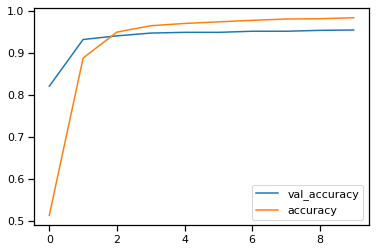

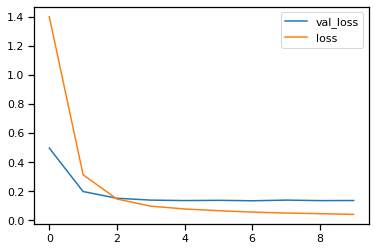

In [296]:
np.random.seed(42)

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_LENGTH, mask_zero=True))
model.add(Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2), merge_mode='concat'))
model.add(Dropout(0.2))
model.add(Dense(len(tag2int), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train, train_tags_1hot, epochs=num_epoch, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.00001)])
    
acc = pd.DataFrame(history.history)
acc[['val_accuracy', 'accuracy']].plot.line();
acc[['val_loss', 'loss']].plot.line();
        
loss, accuracy = model.evaluate(X_test, test_tags_1hot,
                       batch_size=batch_size, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# <center> The Final Outcome

The main aim of the project was to understand whether we can predict the race (human or robot) of the characters from a famous Westworld TV-show by HBO by analyzing their replicas.

This task proved to be more challenging than was expected, first we had to annotate subtitles for all the episodes of the show by rewatching the whole show. Also, apparently the replicas are written in a very similar way for both the humans and robots in the show and therefore finding patterns that would indicate the race of the speaker proved to be a hard task to crack.

We managed to beat the baseline method of Logistic Regression even though it took us way more effort than we anticipated and we had to try six or seven different methods to achieve any reportable result. 

Following is the summary of all the parts of the project:

1. **Data Collection and Preprocessing**: We manually annotated all of the Westworld episodes and acquired about 7,500 usable replicas with the character's name and a binary variable signaling whether or not they are human.

    

2. **Analysis**: The previously obtained dataset was used for following purposes: 

a) **LDA**: Method resulted in the usage of 4 topics. One of the topics was self-preservation efforts of the robots, another one was centered around deeper conversations about the meaning of the uprising. Next one around the conversations of humans aiming to contain the robots and the last one around focused on the story line with Dolores.

b) **Document Embeddings**: Doc2Vec model was used as input to multiple clustering techniques to find out, whether we can separate the data into meaningful clusters. After using Agglomerative Clustering and K-means, which both gave the best scores for two clusters but we were not able to find any clear separation after dimensionality reduction, further clustering methods were examined. DBSCAN and HDSCAN both showed the inability to separate the clusters effectively and therefore we believe there is not clear separation of the data when represented as Doc2Vec. 

3. **Classification**: This is the part where the main question of the study, whether we can tell apart humans from robots was answered. Following is the summary of all the used methods:

| Model | Test Accuracy |
| --- | --- | --- |
| Dummy Baseline | 52% |
| Logistic Regression (TFIDF) | 60% |
| Logistic Regression (Glove) | 59% |
| Random Forest (TFIDF) | 63% |
| Random Forest (Glove) | 59% |
| SVC (TFIDF)  | 63% |
| SVC (Glove)   | 60% |
| LSTM (int encoded words)  |  52% |
| BiLSTM (int encoded words)   | 63% |
| CNN (int encoded words)  | 60% |
| CNN-VGG16 (int encoded words)   | 61% |
| HAN (int encoded words)  | 63% |

4. **Structured Prediction**: The POS tagging task for the dataset was chosen as the structure of the data did not allow us to perform more complicated tasks. We used spacy library to annotate the POS training set and then used the following methods for the prediction on the test set:

| Model of the Perceptron  | Viterbi Test Accuracy  | Greedy Test Accuracy | Overall Test Accuracy |
| --- | --- | --- | --- |
| Basic | 0.95 | 0.93 | NA |
| Added Features | 0.97 | 0.95 | NA |
| RNN | NA | NA | 0.94 |